# Exploratory data analysis

For this notebook, I borrowed code from Sadegh Bolouki's [Bank Account Fraud Detection: EDA and Model](https://www.kaggle.com/code/bolouki/bank-account-fraud-detection-eda-and-model).

In [19]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors
import seaborn as sns

# Define custom colors/cmaps/palettes for visualization purposes.
denim='#6F8FAF'
salmon='#FA8072'
slate_gray = '#404040'
cmap=matplotlib.colors.LinearSegmentedColormap.from_list("",[denim,salmon])
palette = 'colorblind'
sns.set_style('darkgrid')

from sklearn.model_selection import train_test_split

In [3]:
# Data loading
df = pd.read_csv('../data/Base.csv')

target = 'fraud_bool'

X = df.drop(target,axis=1)
y = df[target]

In [7]:
# Train/test split with stratified sampling

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

train = pd.concat([X_train, y_train], axis=1).copy()
train_copy = pd.concat([X_train, y_train], axis=1).copy()

In [4]:
feature_descriptions = {
    'income' : "Annual income of the applicant (in decile form). Ranges between [0.1, 0.9].",
    'name_email_similarity' : "Metric of similarity between email and applicant’s name. Higher values represent higher similarity. Ranges between [0, 1].",
    'prev_address_months_count' : "Number of months in previous registered address of the applicant, i.e. the applicant’s previous residence, if applicable. Ranges between [−1, 380] months (-1 is a missing value).",
    'current_address_months_count' : "Months in currently registered address of the applicant. Ranges between [−1, 429] months (-1 is a missing value).",
    'customer_age' : "Applicant’s age in years, rounded to the decade. Ranges between [10, 90] years.",
    'days_since_request' : "Number of days passed since application was done. Ranges between [0, 79] days.",
    'intended_balcon_amount' : "Initial transferred amount for application. Ranges between [−16, 114] (negatives are missing values).",
    'payment_type': "Credit payment plan type. 5 possible (annonymized) values.",
    'zip_count_4w' : "Number of applications within same zip code in last 4 weeks. Ranges between [1, 6830].",
    'velocity_6h' : "Velocity of total applications made in last 6 hours i.e., average number of applications per hour in the last 6 hours. Ranges between [−175, 16818].",
    'velocity_24h' : "Velocity of total applications made in last 24 hours i.e., average number of applications per hour in the last 24 hours. Ranges between [1297, 9586].",
    'velocity_4w' : "Velocity of total applications made in last 4 weeks, i.e., average number of applications per hour in the last 4 weeks. Ranges between [2825, 7020].",
    'bank_branch_count_8w' : "Number of total applications in the selected bank branch in last 8 weeks. Ranges between [0, 2404].",
    'date_of_birth_distinct_emails_4w' : "Number of emails for applicants with same date of birth in last 4 weeks. Ranges between [0, 39].",
    'employment_status' : "Employment status of the applicant. 7 possible (annonymized) values.",
    'credit_risk_score' : "Internal score of application risk. Ranges between [−191, 389].",
    'email_is_free' : "Domain of application email (either free or paid).",
    'housing_status' : "Current residential status for applicant. 7 possible (annonymized) values.",
    'phone_home_valid' : "Validity of provided home phone.",
    'phone_mobile_valid' : "Validity of provided mobile phone.",
    'bank_months_count' : "How old is previous account (if held) in months. Ranges between [−1, 32] months (-1 is a missing value).",
    'has_other_cards' : "If applicant has other cards from the same banking company.",
    'proposed_credit_limit' : "Applicant’s proposed credit limit. Ranges between [200, 2000].",
    'foreign_request' : "If origin country of request is different from bank’s country.",
    'source' : "Online source of application. Either browser (INTERNET) or app (TELEAPP).",
    'session_length_in_minutes' : "Length of user session in banking website in minutes. Ranges between [−1, 107] minutes (-1 is a missing value).",
    'device_os' : "Operative system of device that made request. Possible values are: Windows, macOS, Linux, X11, or other.",
    'keep_alive_session' : "User option on session logout.",
    'device_distinct_emails_8w' : "Number of distinct emails in banking website from the used device in last 8 weeks. Ranges between [−1, 2] emails (-1 is a missing value).",
    'device_fraud_count' : "Number of fraudulent applications with used device. Ranges between [0, 1].",
    'month' : "Month where the application was made. Ranges between [0, 7].",
    'fraud_bool' : "If the application is fraudulent or not."
}

In [8]:
# Numerical (continuous/discrete) and categorical features

num_feats = X_train.select_dtypes(include='number').columns.tolist()

thresh = 25

cont_feats = [feat for feat in num_feats if df[feat].nunique() >= thresh]
disc_feats = [feat for feat in num_feats if df[feat].nunique() < thresh]

cat_feats = X_train.select_dtypes(exclude='number').columns.tolist()

print(f'Features: {X_train.shape[1]}\n\n\
Continuous: {len(cont_feats)}\n\
{cont_feats}\n\n\
Discrete: {len(disc_feats)}\n\
{disc_feats}\n\n\
Categorical: {len(cat_feats)}\n\
{cat_feats}')


Features: 31

Continuous: 14
['name_email_similarity', 'prev_address_months_count', 'current_address_months_count', 'days_since_request', 'intended_balcon_amount', 'zip_count_4w', 'velocity_6h', 'velocity_24h', 'velocity_4w', 'bank_branch_count_8w', 'date_of_birth_distinct_emails_4w', 'credit_risk_score', 'bank_months_count', 'session_length_in_minutes']

Discrete: 12
['income', 'customer_age', 'email_is_free', 'phone_home_valid', 'phone_mobile_valid', 'has_other_cards', 'proposed_credit_limit', 'foreign_request', 'keep_alive_session', 'device_distinct_emails_8w', 'device_fraud_count', 'month']

Categorical: 5
['payment_type', 'employment_status', 'housing_status', 'source', 'device_os']


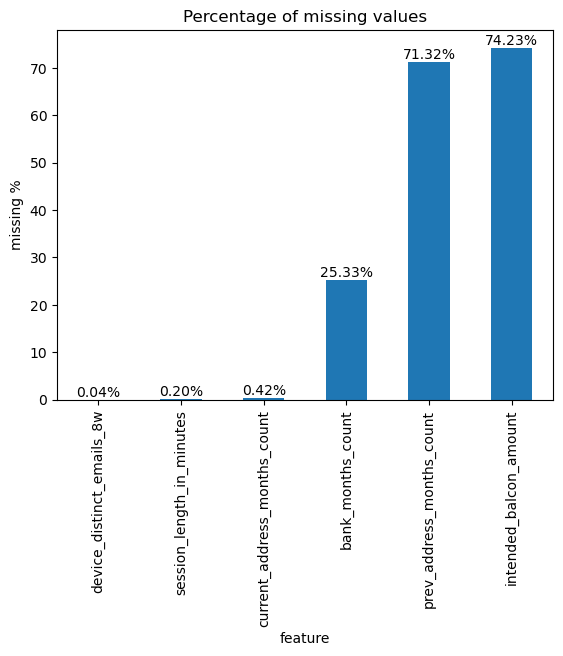

In [13]:
# Missing values
# The datasheet details how the missing values are represented

cols_missing_neg1 = ['prev_address_months_count',
                     'current_address_months_count',
                     'bank_months_count',
                     'session_length_in_minutes',
                     'device_distinct_emails_8w']

X_train[cols_missing_neg1] = X_train[cols_missing_neg1].replace(-1,np.nan)

col_missing_neg = 'intended_balcon_amount'

X_train[col_missing_neg] = X_train[col_missing_neg]\
    .apply(lambda x: np.nan if x < 0 else x)

# Missing values by feature

null_X_train = X_train.isna().sum()/len(X_train)*100

fig = plt.figure(figsize=(6.4,4.8))
ax = null_X_train.loc[null_X_train>0].sort_values()\
    .plot(kind='bar',title='Percentage of missing values')

for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}%',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom', xytext=(0,0), textcoords='offset points')

ax.set_ylabel('missing %')
ax.set_xlabel('feature')

ax.xaxis.grid(False)

plt.show()

In [14]:
# Customized description and plots for any given feature

def summary(feat):
    
    if feat in cont_feats:
        cont_summary(feat)
        cont_plots(feat)
    elif feat in disc_feats:
        disc_summary(feat)
        disc_plots(feat)
    else:
        cat_summary(feat)
        cat_plots(feat)
    
    missing_flag_plot(feat)
    
    return

# Customized description for continuous features

def cont_summary(feat):

    # Create an empty summary
    columns = ['dtype', 'count', 'unique', 'top_value_counts', 'missing_count',
               'missing_percentage','mean', 'std', 'min', 'median', 'max',
               'corr_with_target']
    summary = pd.DataFrame(index=[feat],columns=columns,dtype=float)
    
    # Pull the feature column in question
    col = X_train[feat].copy()
    
    # Basic statistics using the original describe method
    summary.loc[feat,['count','mean', 'std', 'min', 'median', 'max']]\
        = col.describe(percentiles=[.5]).values.transpose()
    
    # Number of unique values
    summary.loc[feat,'unique'] = col.nunique()

    # Missing values count
    summary.loc[feat,'missing_count'] = col.isnull().sum()

    # Missing values percentage
    summary.loc[feat,'missing_percentage'] = col.isnull().sum()/len(col)*100

    # Correlation with target
    summary.loc[feat,'corr_with_target'] = col.corr(y_train)
    
    int_cols = ['count', 'unique', 'missing_count']
    summary[int_cols] = summary[int_cols].astype(int)
    summary = summary.round(2).astype(str)

    # Top 3 value_counts
    value_counts = X_train[feat].value_counts().head(3)
    value_counts.index = value_counts.index.astype(float).to_numpy().round(2)
    summary.loc[feat,'top_value_counts'] = str(value_counts.to_dict())

    # Data type
    summary.loc[feat,'dtype'] = col.dtypes
    
    return display(summary)

# Customized plots for continuous features

def cont_plots(feat,bins='auto'):
    
    n_cols = 3
    fig, axes = plt.subplots(1, n_cols, figsize=(6.4*n_cols, 4.8))
    
    # Histogram
    sns.histplot(data=X_train,
                 x=feat,
                 bins=bins,
                 ax=axes[0],
                 color=slate_gray)
    
    # Box plots with the target as hue
    sns.boxplot(data=X_train,
                x=feat,
                y=y_train,
                ax=axes[1],
                palette=palette,
                orient='h')
    
#     KDE plots with the target as hue
    sns.kdeplot(data=X_train,
                x=feat,
                hue=y_train,
                palette=palette,
                fill=True,
                common_norm=False,
                ax=axes[2])
    
    axes[0].title.set_text('Histogram')
    axes[1].title.set_text('Box Plots')
    axes[2].title.set_text('KDE Plots')
    
    fig.tight_layout()
    plt.show()
    return

# Customized description for discrete features

def disc_summary(feat):
    
    # Create an empty summary
    columns = ['dtype', 'count', 'unique', 'missing_count', 'missing_percentage', 
               'mean', 'std', 'min', 'median', 'max', 'cv', 'corr_with_target']
    summary = pd.DataFrame(index=[feat],columns=columns,dtype=float)
    
    # Pull the feature column in question
    col = X_train[feat].copy()
    
    # Basic statistics using the original describe method
    summary.loc[feat,['count','mean', 'std', 'min', 'median', 'max']]\
    = col.describe(percentiles=[.5]).values.transpose()

    # Number of unique values
    summary.loc[feat,'unique'] = col.nunique()

    # Coefficient of Variation (CV)    
    summary.loc[feat,'cv'] = np.NaN if not col.mean() else col.std()/col.mean()

    # Missing values count
    summary.loc[feat,'missing_count'] = col.isnull().sum()

    # Missing values percentage
    summary.loc[feat,'missing_percentage'] = col.isnull().sum()/len(col)*100
    
    # Correlation with target
    summary.loc[feat,'corr_with_target'] = col.corr(y_train)
    
    int_cols = ['count','unique','missing_count']
    summary[int_cols] = summary[int_cols].astype(int)
    summary = summary.round(2).astype(str)
    
    # Data type
    summary.loc[feat,'dtype'] = col.dtypes
    
    
    return display(summary)

# Customized plots for discrete features

def disc_plots(feat):

    col = X_train[feat].copy()    

    n_rows = 1
    n_cols = 2

    fig, axes = plt.subplots(n_rows, n_cols, figsize=(6.4 * n_cols, 4.8 * n_rows))

    # Sort unique values
    unique_values = col.dropna().unique()
    unique_values.sort()

    # Value counts
    val_counts = col.dropna().value_counts()
    val_counts = val_counts.reindex(unique_values)
    val_counts_pct = val_counts/len(col)*100
    
    # Countplot
    sns.countplot(x=col, order=unique_values, palette=palette, ax=axes[0])
    axes[0].xaxis.grid(False)
    
    # Show count value if rare (less than 1%)
    lp_thresh = 1
    for i, p in enumerate(axes[0].patches):
        pct = val_counts_pct.iloc[i]
        axes[0].annotate(f'{pct:.2f}%',
                         (p.get_x() + p.get_width() / 2., p.get_height()),
                         ha='center', va='bottom', xytext=(0,0),
                         textcoords='offset points')
        if pct < lp_thresh:
            axes[0].annotate(val_counts.iloc[i],
                             (p.get_x() + p.get_width() / 2., p.get_height()),
                             ha='center', va='bottom', xytext=(0,10),
                             textcoords='offset points',color='red')
    
    # Barplot
    df = pd.concat([X_train,y_train],axis=1).groupby(feat)[target].mean()*100
    df = df.reindex(unique_values)  # Reindex to match the order
    sns.barplot(x=df.index, y=df.values, palette=palette, ax=axes[1])
    axes[1].set_ylabel('Fraud %')
    axes[1].xaxis.grid(False)

    fig.tight_layout()
    plt.show()
    
    return

# Customized description for categorical features

def cat_summary(feat):
    
    # Create an empty summary
    columns = ['dtype', 'count', 'unique', 'missing_count', 'missing_percentage']
    summary = pd.DataFrame(index=[feat],columns=columns,dtype=float)
    
    # Pull the feature column in question
    col = X_train[feat].copy()
    
    # Count
    summary.loc[feat,'count'] = col.count()

    # Number of unique values
    summary.loc[feat,'unique'] = col.nunique()

    # Missing values count
    summary.loc[feat,'missing_count'] = col.isnull().sum()

    # Missing values percentage
    summary.loc[feat,'missing_percentage'] = col.isnull().sum()/len(col)*100
    
    int_cols = ['count', 'unique', 'missing_count']
    summary[int_cols] = summary[int_cols].astype(int)
    summary = summary.round(2).astype(str)

    # Data type
    summary.loc[feat,'dtype'] = col.dtypes
    
    return display(summary)

# Customized plots for categorical features

def cat_plots(feat):
    
    col = X_train[feat].copy()
    
    n_rows = 1
    n_cols = 2

    fig, axes = plt.subplots(n_rows, n_cols, figsize=(6.4 * n_cols, 4.8 * n_rows))
    
    # Value counts
    val_counts = col.dropna().value_counts()
    
    # Unique values
    unique_values = val_counts.index

    # Countplot with sorted order
    sns.countplot(x=col, order=unique_values, palette=palette, ax=axes[0])
    axes[0].xaxis.grid(False)

    val_counts_pct = val_counts/len(col)*100
    
    # Show count value if rare (less than 1%)
    lp_thresh = 1
    for i, p in enumerate(axes[0].patches):
        pct = val_counts_pct.iloc[i]
        axes[0].annotate(f'{pct:.2f}%',
                         (p.get_x() + p.get_width() / 2., p.get_height()),
                         ha='center', va='bottom', xytext=(0,0),
                         textcoords='offset points')
        if pct < lp_thresh:
            axes[0].annotate(val_counts.iloc[i],
                             (p.get_x() + p.get_width() / 2., p.get_height()),
                             ha='center', va='bottom', xytext=(0,10),
                             textcoords='offset points',color='red')
            
    # Barplot with the same order
    df = pd.concat([X_train,y_train],axis=1).groupby(feat)[target].mean()*100
    sns.barplot(x=df.index, y=df.values, order=unique_values, palette=palette, ax=axes[1])
    axes[1].set_ylabel('Fraud %')
    axes[1].xaxis.grid(False)

    fig.tight_layout()
    plt.show()
    
    return

# Plot for the missing flag associated with a feature

def missing_flag_plot(feat):
    col = X_train[feat].isnull().astype(int)

    if not col.sum():
        return

    df = (pd.concat([col,y_train],axis=1).groupby(feat).mean()*100).reset_index()
    cols = [f'MISSING_FLAG_{feat}', 'Fraud %']
    df.columns = cols
    fig = plt.figure(figsize=(6.4, 4.8))
    ax = sns.barplot(data=df,x=cols[0], y=cols[1], palette=palette)
    
    fig.tight_layout()
    plt.show()
    
    return


## Continuous features

Applying `summary` function to all continuous features:

 Feature: 'name_email_similarity'

 Description: Metric of similarity between email and applicant’s name. Higher values represent higher similarity. Ranges between [0, 1].


,dtype,count,unique,top_value_counts,missing_count,missing_percentage,mean,std,min,median,max,corr_with_target
name_email_similarity,float64,800000,799289,"{0.23: 2, 0.26: 2, 0.78: 2}",0,0.0,0.49,0.29,0.0,0.49,1.0,-0.04


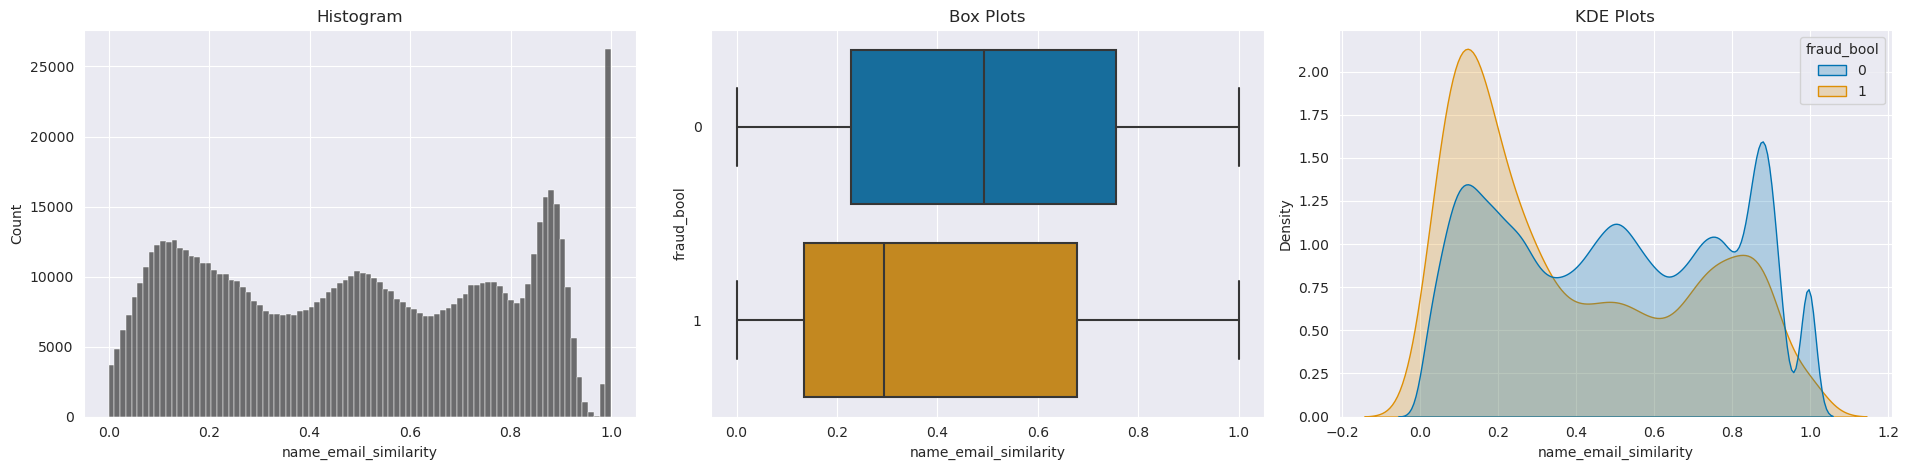

--------------------------------------------- 

 Feature: 'prev_address_months_count'

 Description: Number of months in previous registered address of the applicant, i.e. the applicant’s previous residence, if applicable. Ranges between [−1, 380] months (-1 is a missing value).


,dtype,count,unique,top_value_counts,missing_count,missing_percentage,mean,std,min,median,max,corr_with_target
prev_address_months_count,float64,229475,373,"{11.0: 9204, 28.0: 8246, 29.0: 8079}",570525,71.32,60.71,63.55,5.0,34.0,383.0,0.02


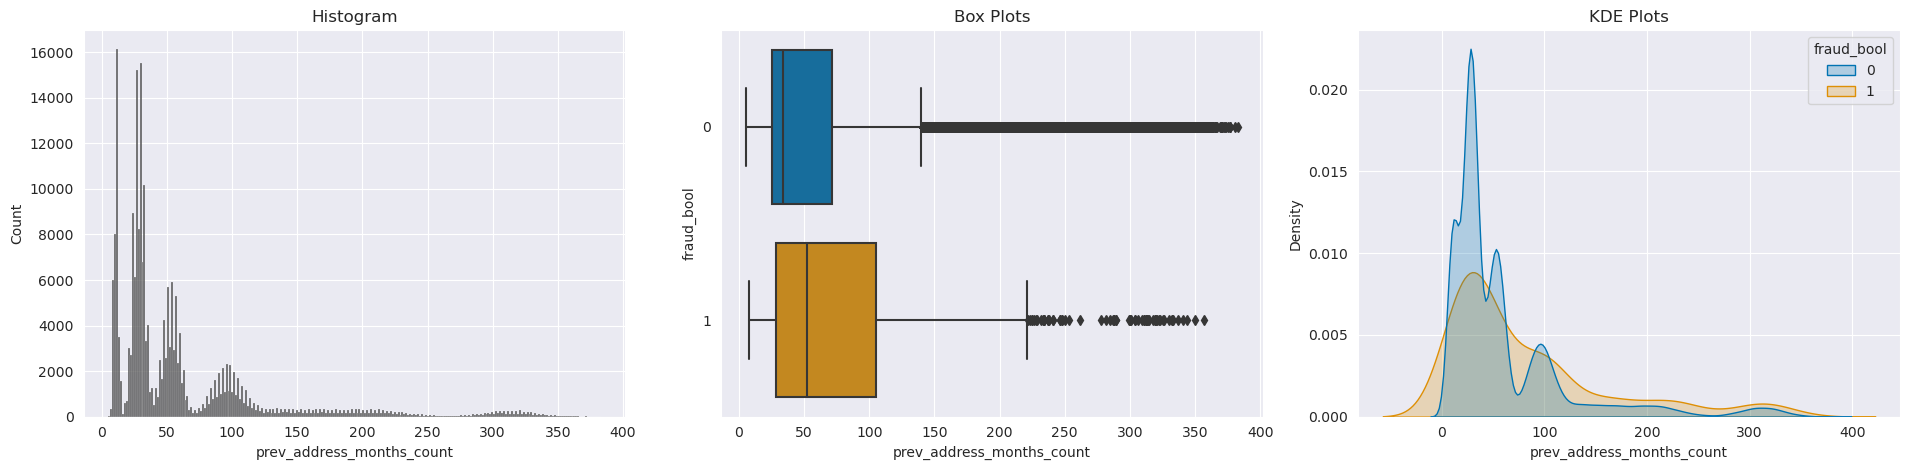

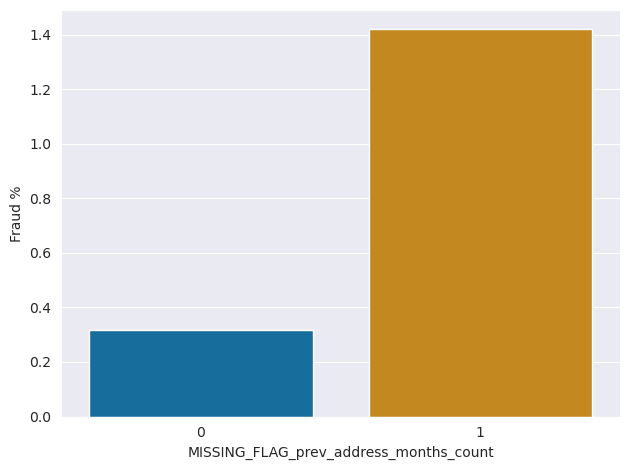

--------------------------------------------- 

 Feature: 'current_address_months_count'

 Description: Months in currently registered address of the applicant. Ranges between [−1, 429] months (-1 is a missing value).


,dtype,count,unique,top_value_counts,missing_count,missing_percentage,mean,std,min,median,max,corr_with_target
current_address_months_count,float64,796609,420,"{6.0: 13001, 7.0: 12952, 8.0: 12874}",3391,0.42,86.99,88.39,0.0,53.0,428.0,0.03


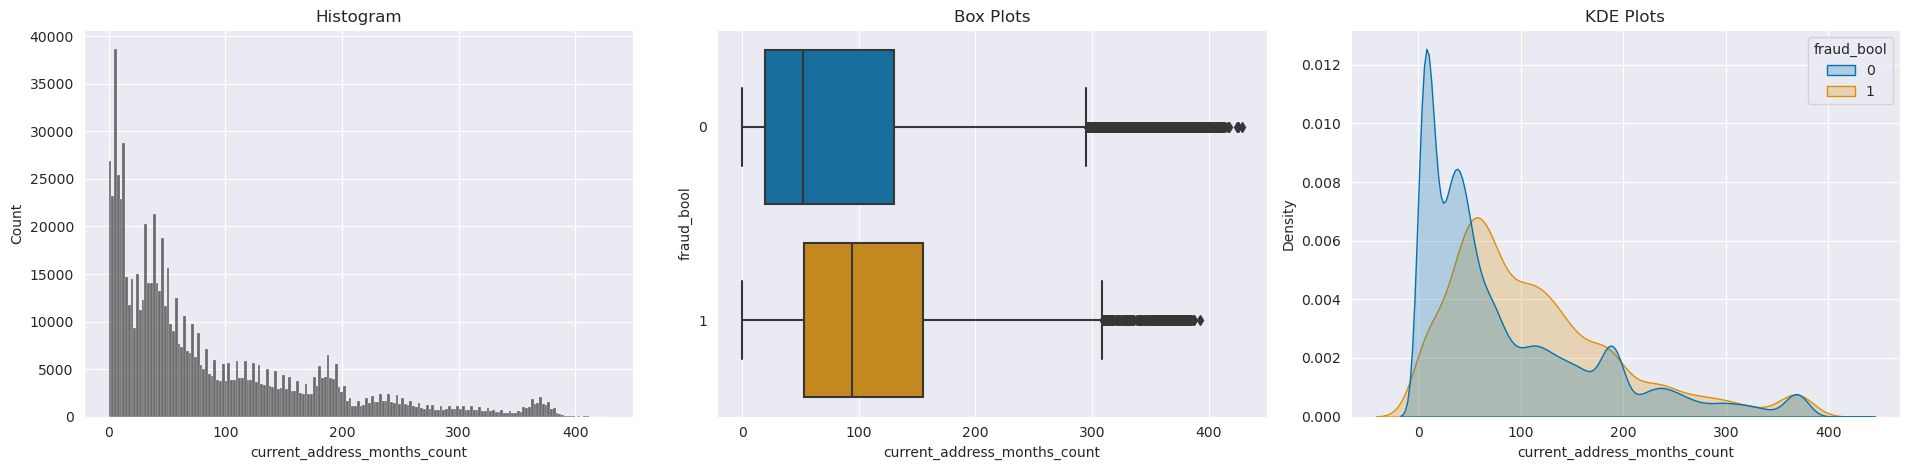

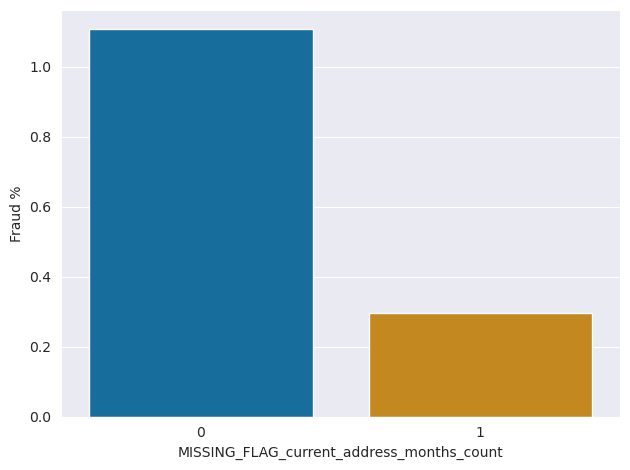

--------------------------------------------- 

 Feature: 'days_since_request'

 Description: Number of days passed since application was done. Ranges between [0, 79] days.


,dtype,count,unique,top_value_counts,missing_count,missing_percentage,mean,std,min,median,max,corr_with_target
days_since_request,float64,800000,793121,"{0.01: 3, 0.02: 3}",0,0.0,1.02,5.38,0.0,0.02,78.46,0.0


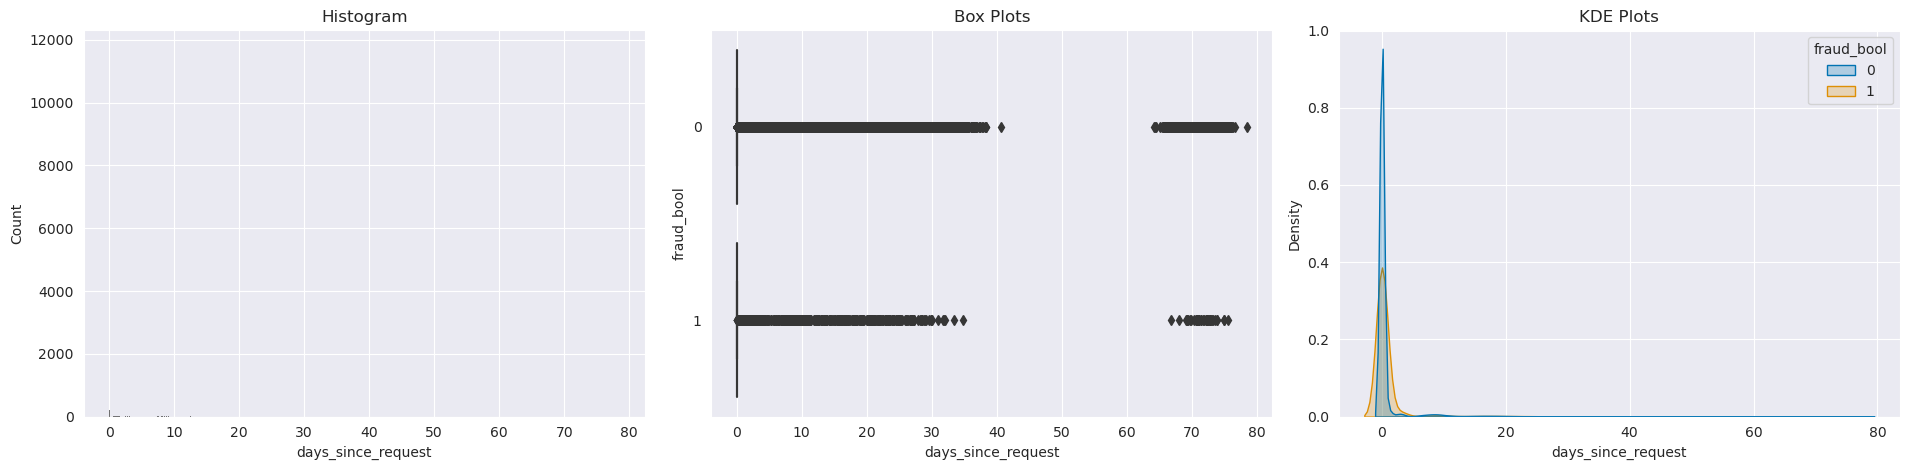

--------------------------------------------- 

 Feature: 'intended_balcon_amount'

 Description: Initial transferred amount for application. Ranges between [−16, 114] (negatives are missing values).


,dtype,count,unique,top_value_counts,missing_count,missing_percentage,mean,std,min,median,max,corr_with_target
intended_balcon_amount,float64,206132,205910,"{39.07: 2, 36.04: 2, 15.63: 2}",593868,74.23,36.57,23.22,0.0,32.45,112.96,0.01


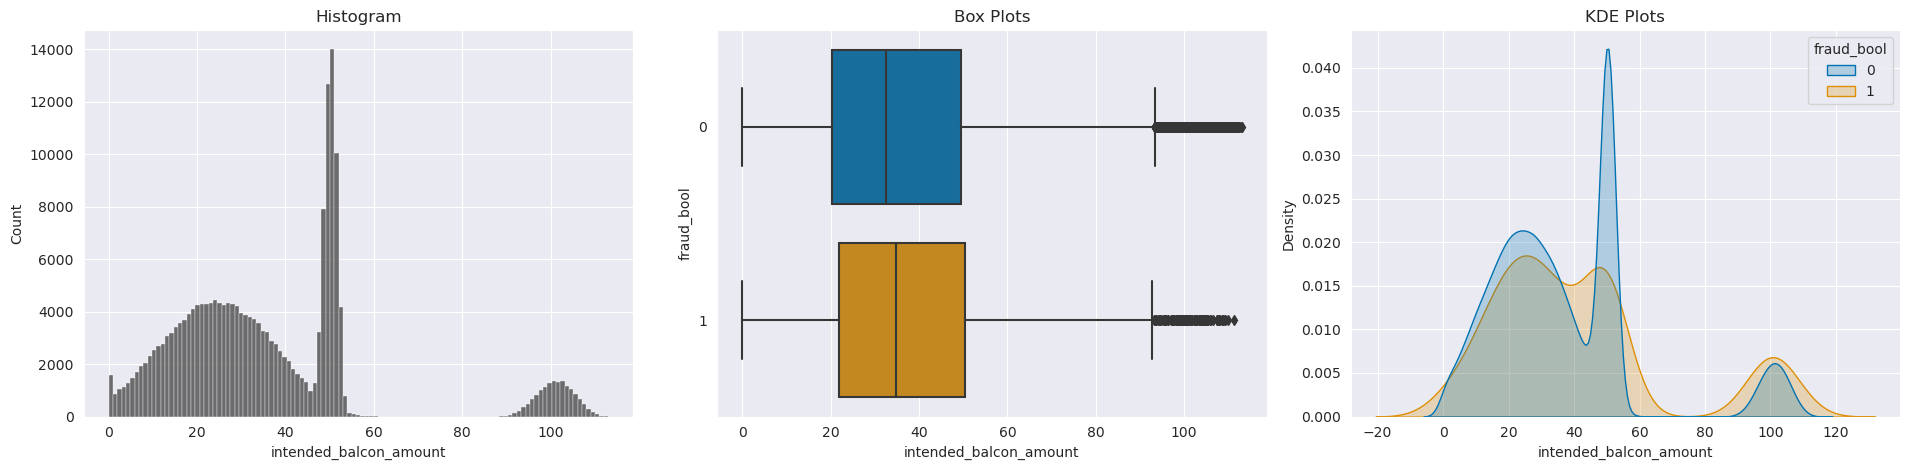

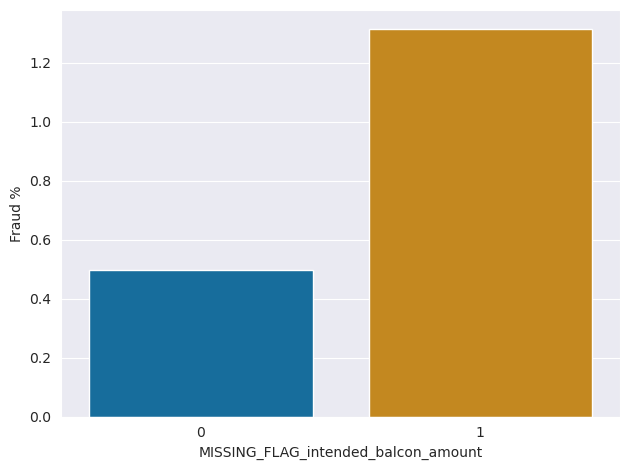

--------------------------------------------- 

 Feature: 'zip_count_4w'

 Description: Number of applications within same zip code in last 4 weeks. Ranges between [1, 6830].


,dtype,count,unique,top_value_counts,missing_count,missing_percentage,mean,std,min,median,max,corr_with_target
zip_count_4w,int64,800000,6268,"{1062.0: 645, 1020.0: 644, 941.0: 622}",0,0.0,1572.77,1005.23,1.0,1263.0,6700.0,0.01


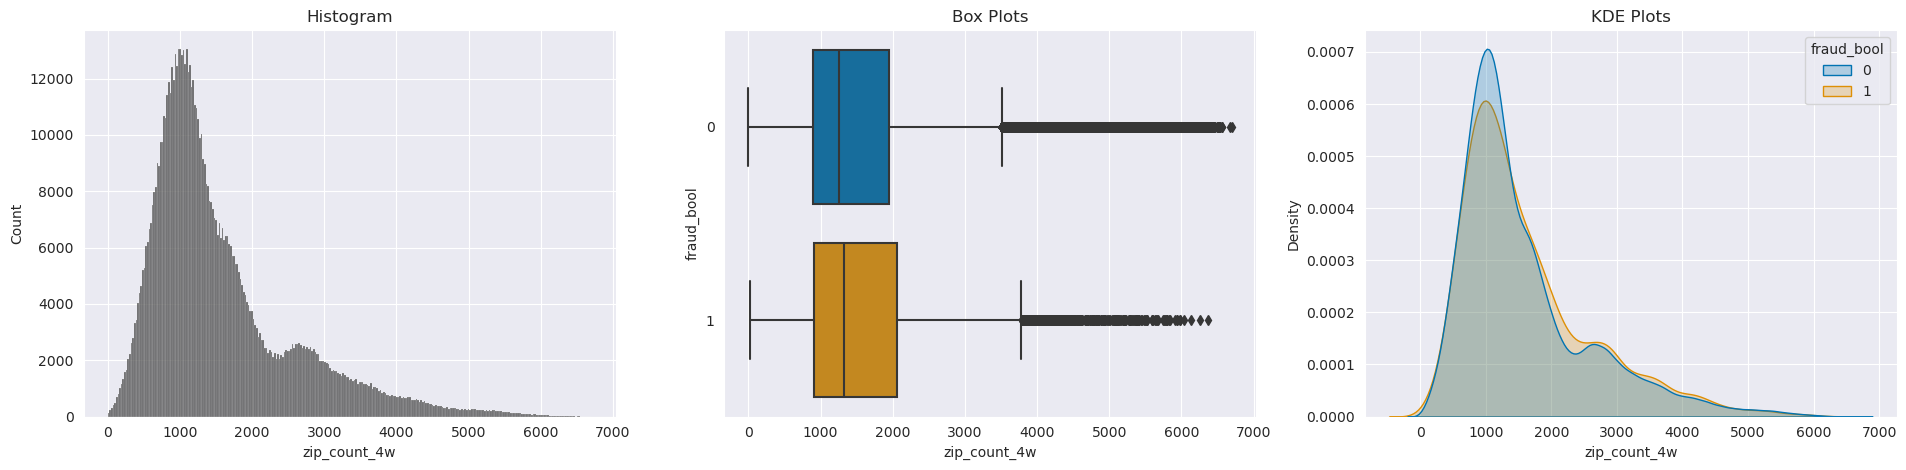

--------------------------------------------- 

 Feature: 'velocity_6h'

 Description: Velocity of total applications made in last 6 hours i.e., average number of applications per hour in the last 6 hours. Ranges between [−175, 16818].


,dtype,count,unique,top_value_counts,missing_count,missing_percentage,mean,std,min,median,max,corr_with_target
velocity_6h,float64,800000,799150,"{2985.72: 2, 5900.35: 2, 8769.6: 2}",0,0.0,5664.02,3009.68,-170.6,5316.3,16715.57,-0.02


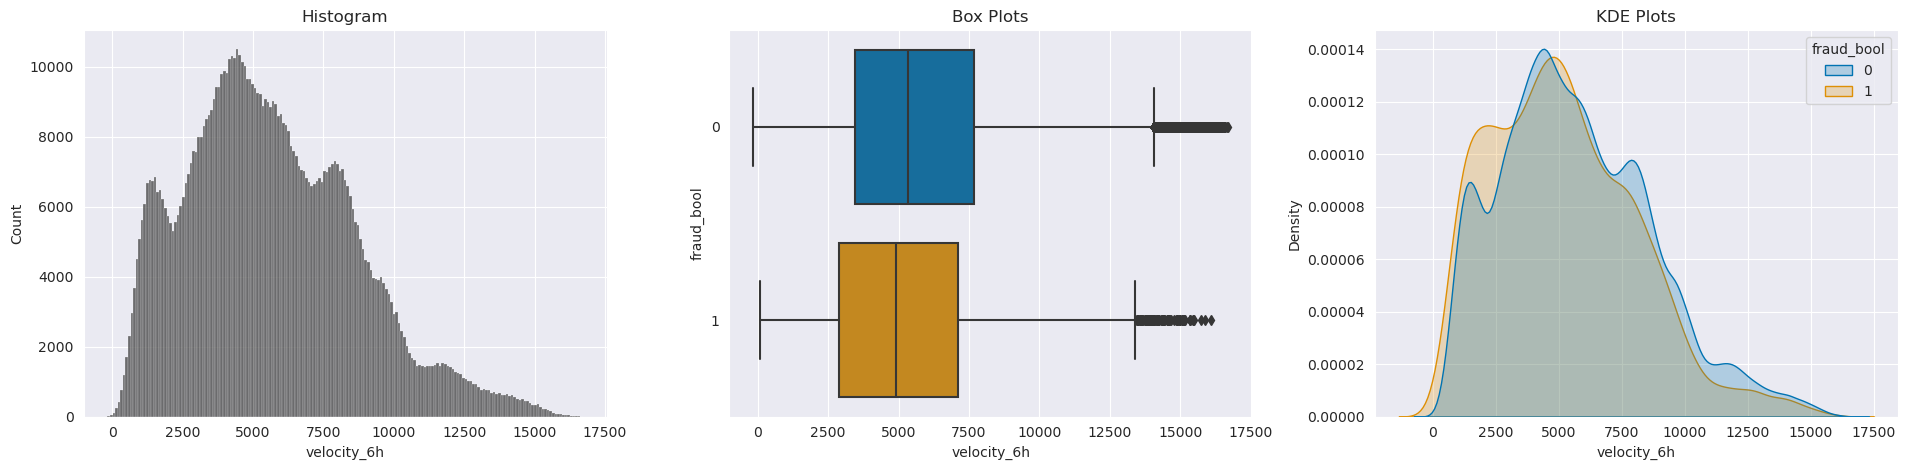

--------------------------------------------- 

 Feature: 'velocity_24h'

 Description: Velocity of total applications made in last 24 hours i.e., average number of applications per hour in the last 24 hours. Ranges between [1297, 9586].


,dtype,count,unique,top_value_counts,missing_count,missing_percentage,mean,std,min,median,max,corr_with_target
velocity_24h,float64,800000,799310,"{5082.33: 3, 4667.86: 3, 3906.42: 3}",0,0.0,4770.23,1479.5,1320.28,4750.8,9506.9,-0.01


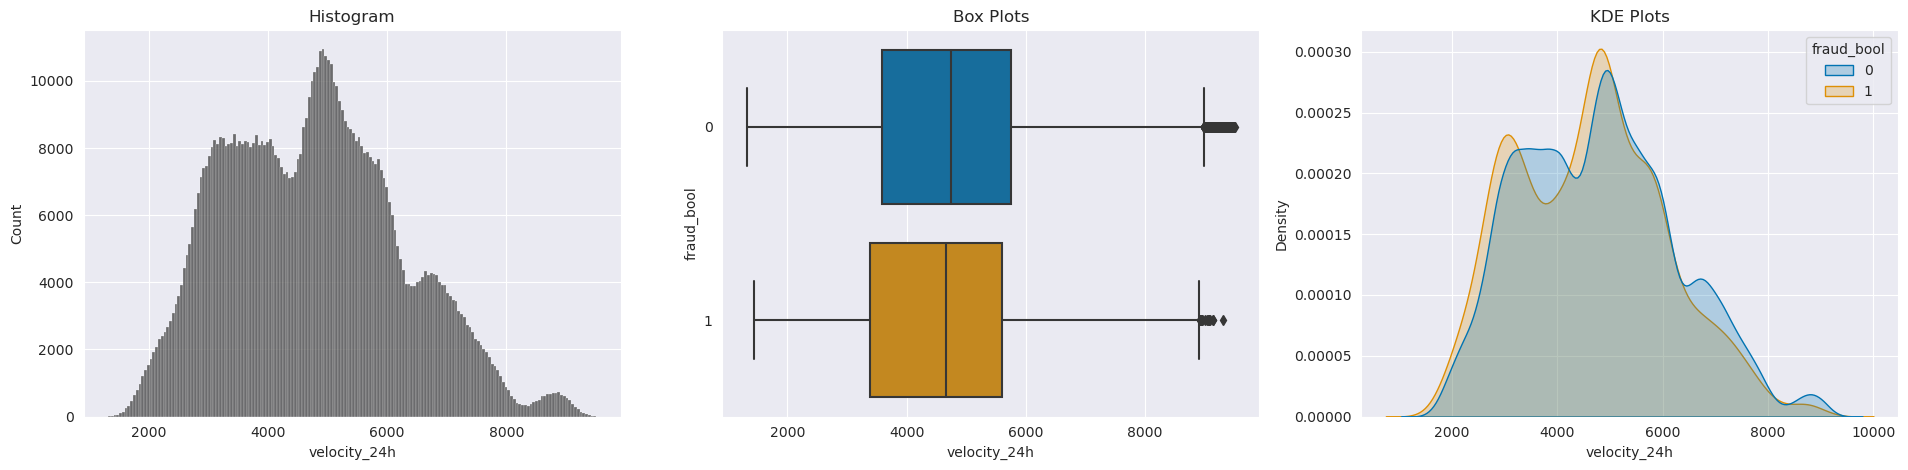

--------------------------------------------- 

 Feature: 'velocity_4w'

 Description: Velocity of total applications made in last 4 weeks, i.e., average number of applications per hour in the last 4 weeks. Ranges between [2825, 7020].


,dtype,count,unique,top_value_counts,missing_count,missing_percentage,mean,std,min,median,max,corr_with_target
velocity_4w,float64,800000,798908,"{5466.87: 3, 3137.5: 2, 4334.23: 2}",0,0.0,4856.0,919.62,2825.75,4913.54,6994.76,-0.01


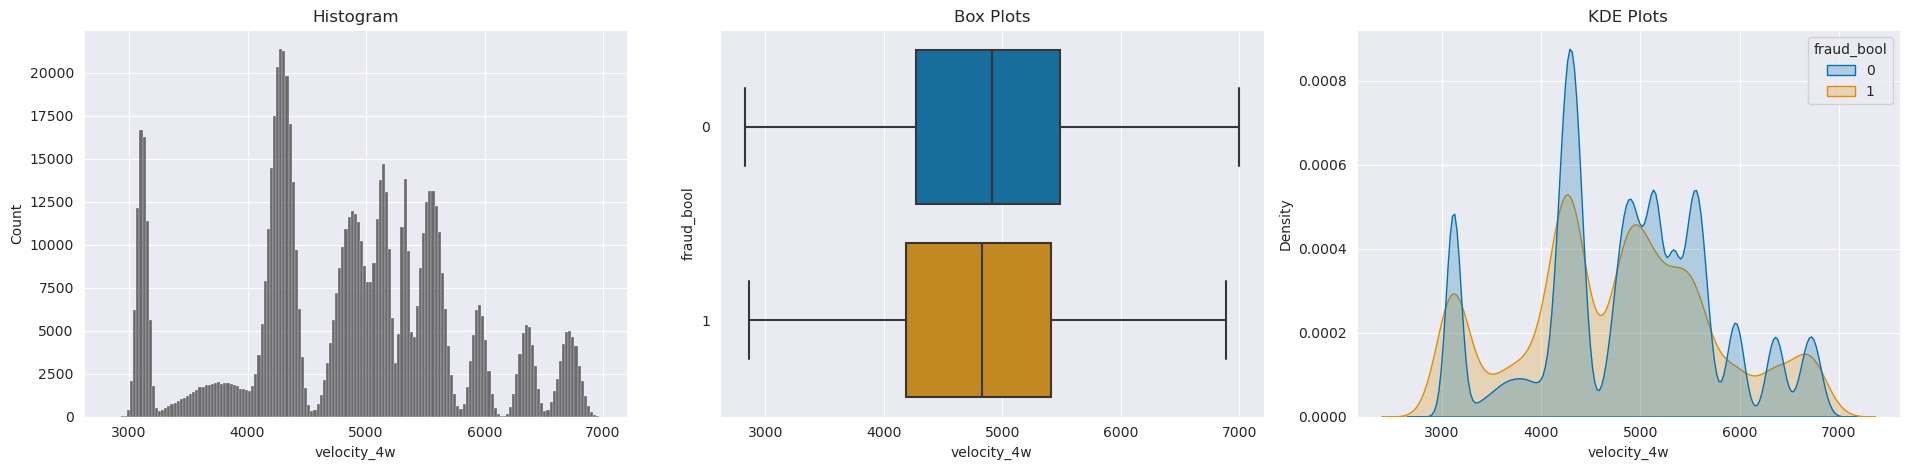

--------------------------------------------- 

 Feature: 'bank_branch_count_8w'

 Description: Number of total applications in the selected bank branch in last 8 weeks. Ranges between [0, 2404].


,dtype,count,unique,top_value_counts,missing_count,missing_percentage,mean,std,min,median,max,corr_with_target
bank_branch_count_8w,int64,800000,2318,"{1.0: 119074, 0.0: 115535, 2.0: 46310}",0,0.0,184.3,459.48,0.0,9.0,2385.0,-0.01


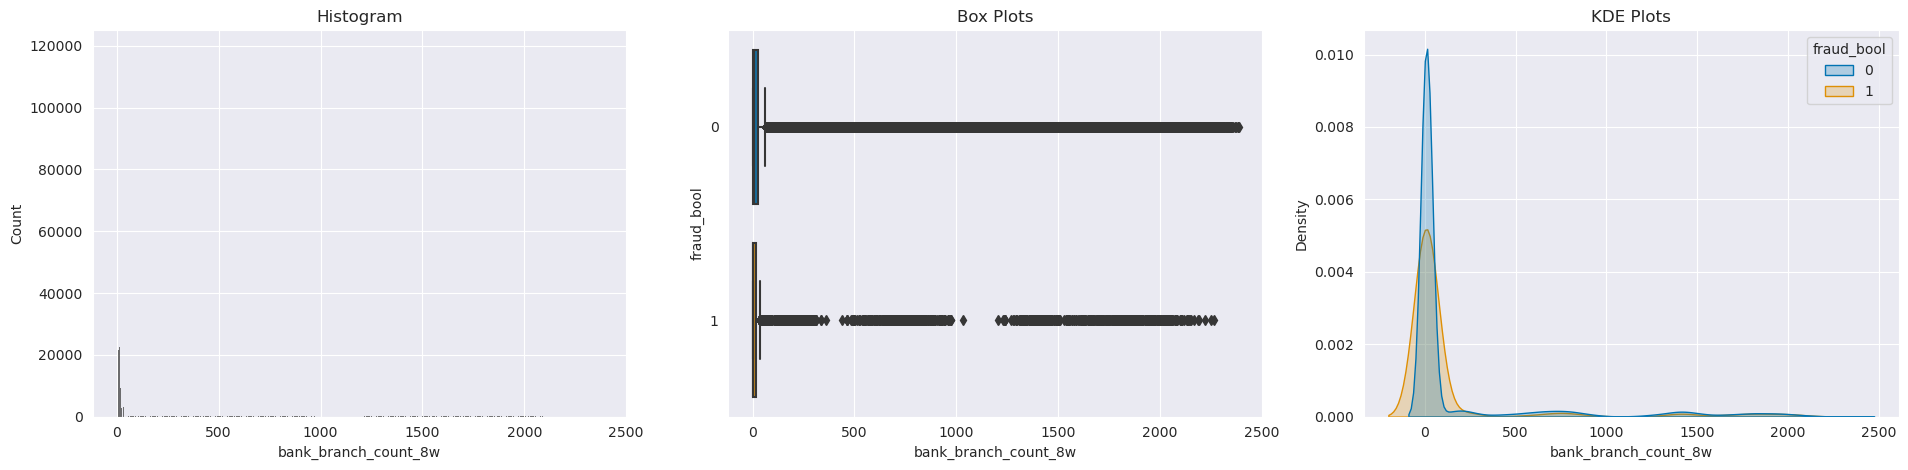

--------------------------------------------- 

 Feature: 'date_of_birth_distinct_emails_4w'

 Description: Number of emails for applicants with same date of birth in last 4 weeks. Ranges between [0, 39].


,dtype,count,unique,top_value_counts,missing_count,missing_percentage,mean,std,min,median,max,corr_with_target
date_of_birth_distinct_emails_4w,int64,800000,40,"{7.0: 66534, 5.0: 64588, 8.0: 63581}",0,0.0,9.5,5.04,0.0,9.0,39.0,-0.04


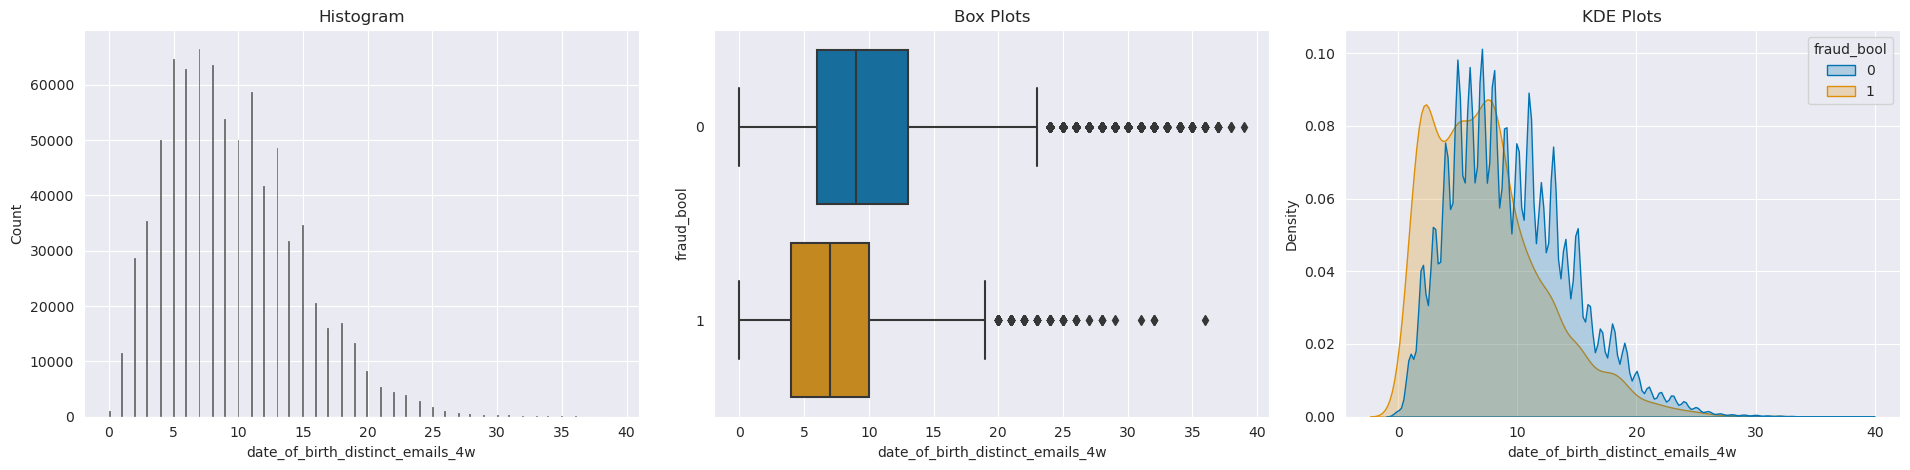

--------------------------------------------- 

 Feature: 'credit_risk_score'

 Description: Internal score of application risk. Ranges between [−191, 389].


,dtype,count,unique,top_value_counts,missing_count,missing_percentage,mean,std,min,median,max,corr_with_target
credit_risk_score,int64,800000,550,"{116.0: 5436, 115.0: 5417, 110.0: 5402}",0,0.0,131.01,69.68,-170.0,122.0,389.0,0.07


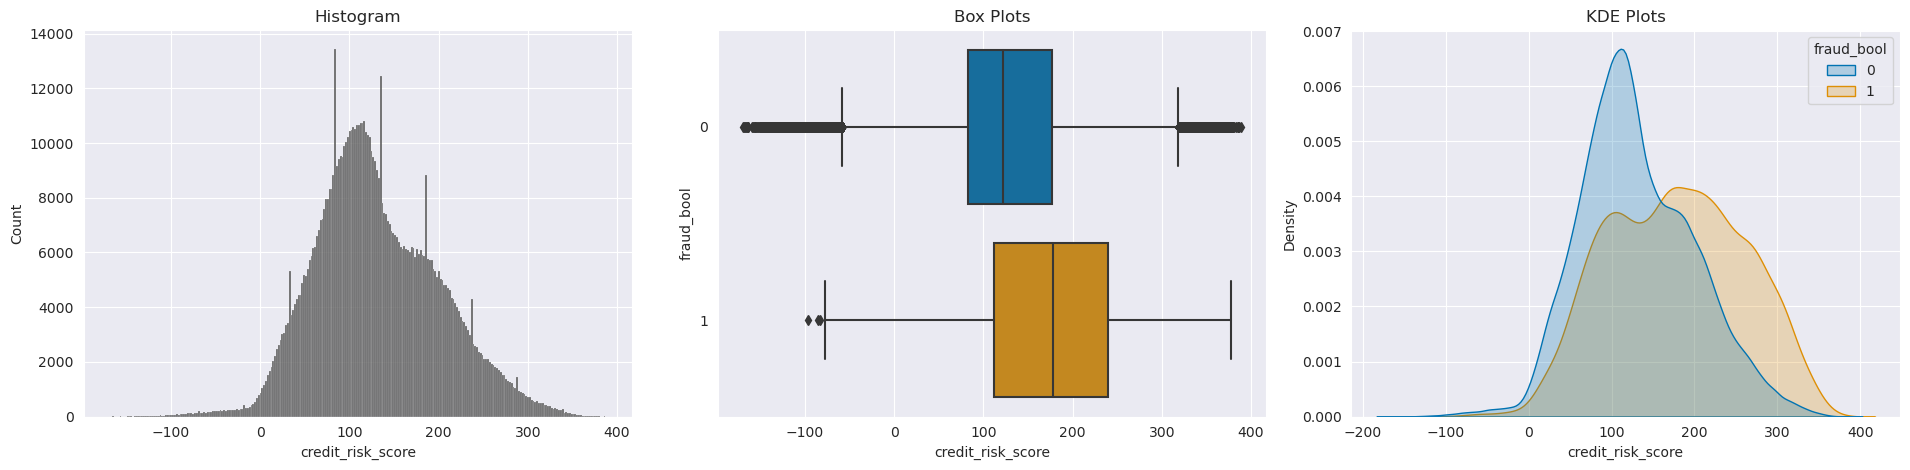

--------------------------------------------- 

 Feature: 'bank_months_count'

 Description: How old is previous account (if held) in months. Ranges between [−1, 32] months (-1 is a missing value).


,dtype,count,unique,top_value_counts,missing_count,missing_percentage,mean,std,min,median,max,corr_with_target
bank_months_count,float64,597396,32,"{1.0: 155878, 28.0: 64172, 15.0: 47326}",202604,25.33,14.87,11.53,1.0,15.0,32.0,0.02


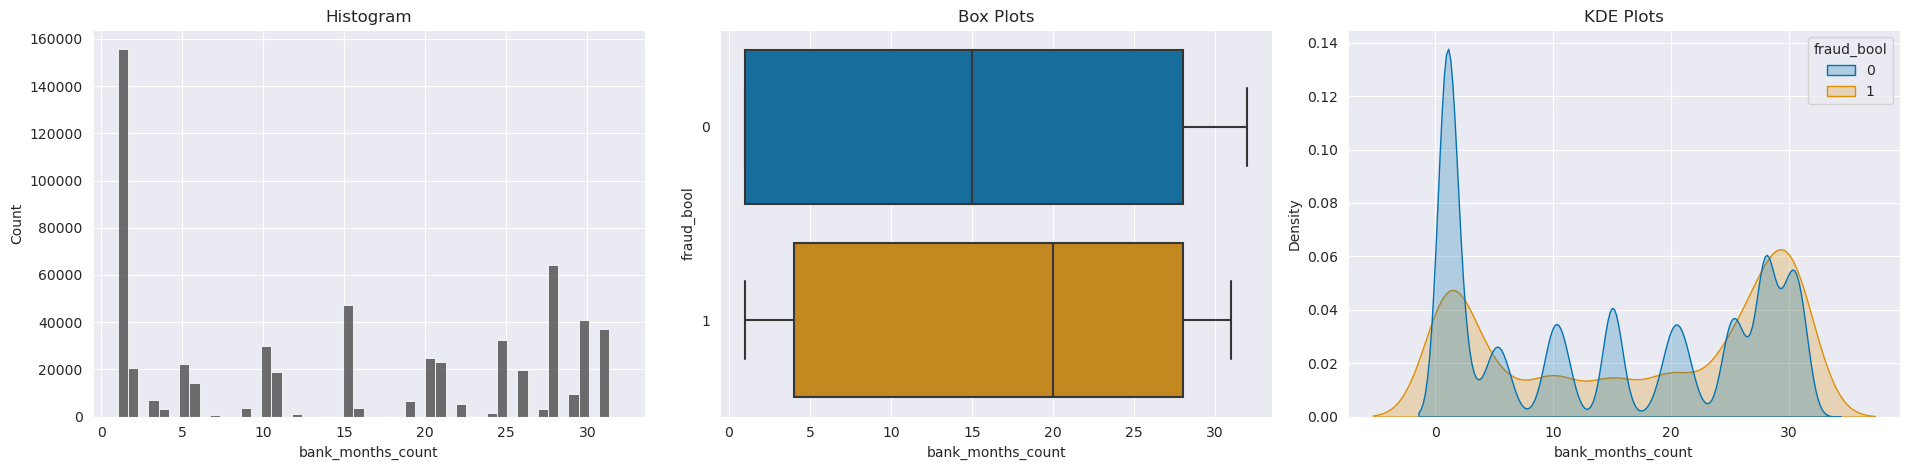

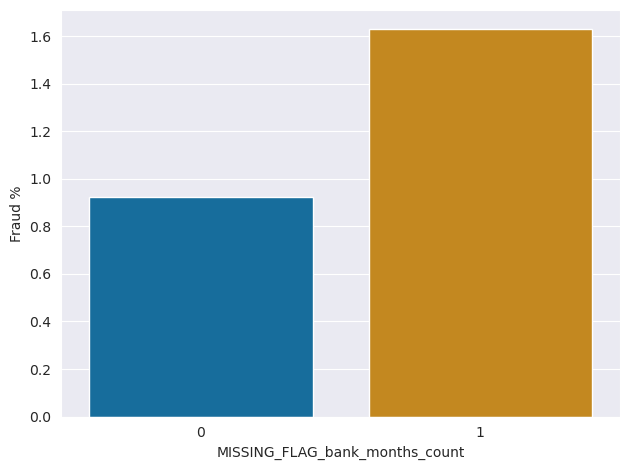

--------------------------------------------- 

 Feature: 'session_length_in_minutes'

 Description: Length of user session in banking website in minutes. Ranges between [−1, 107] minutes (-1 is a missing value).


,dtype,count,unique,top_value_counts,missing_count,missing_percentage,mean,std,min,median,max,corr_with_target
session_length_in_minutes,float64,798377,796390,"{4.74: 3, 4.19: 3, 4.64: 3}",1623,0.2,7.57,8.04,0.0,5.12,85.9,0.01


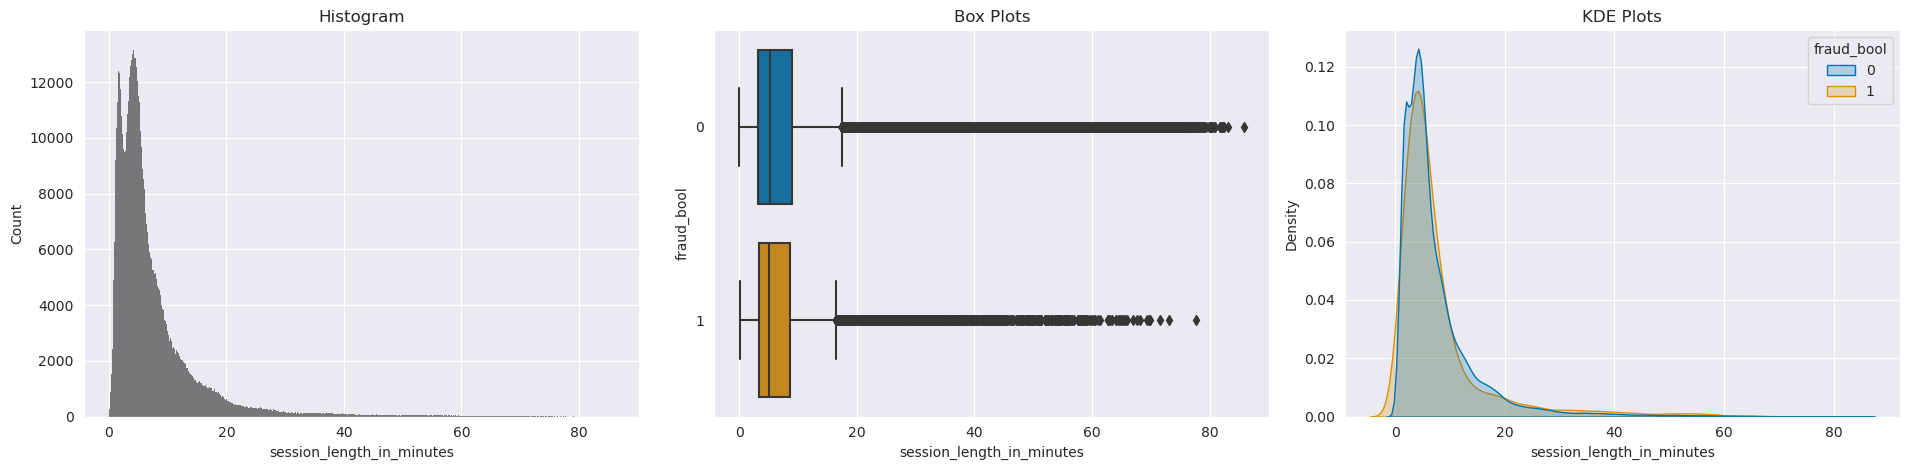

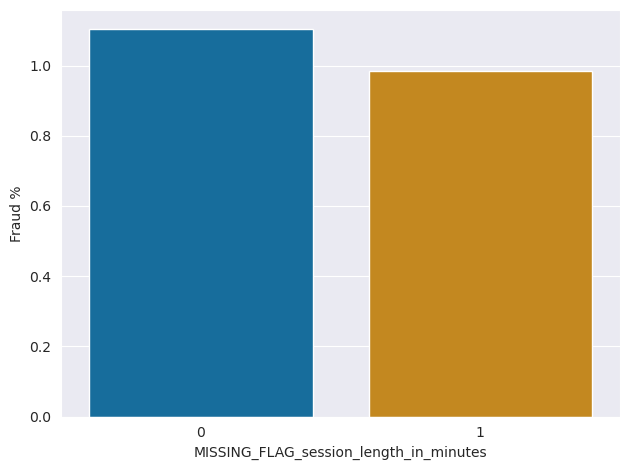

--------------------------------------------- 



In [20]:
for feat in cont_feats:
    print(f"\033[1m Feature:\033[0m '{feat}'\n")
    print(f'\033[1m Description:\033[0m {feature_descriptions[feat]}')
    summary(feat)
    print('-'*45,'\n')

## Discrete / Binary features

Applying `summary` function to all discrete / binary features:

 Feature: 'income'

 Description: Annual income of the applicant (in decile form). Ranges between [0.1, 0.9].


,dtype,count,unique,missing_count,missing_percentage,mean,std,min,median,max,cv,corr_with_target
income,float64,800000,9,0,0.0,0.56,0.29,0.1,0.6,0.9,0.52,0.05


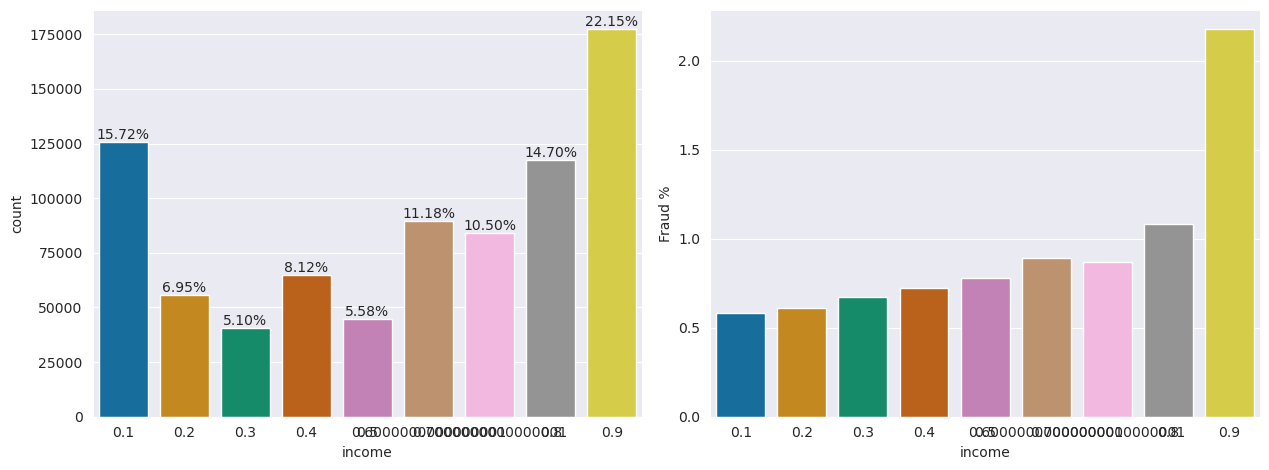

--------------------------------------------- 

 Feature: 'customer_age'

 Description: Applicant’s age in years, rounded to the decade. Ranges between [10, 90] years.


,dtype,count,unique,missing_count,missing_percentage,mean,std,min,median,max,cv,corr_with_target
customer_age,int64,800000,9,0,0.0,33.7,12.03,10.0,30.0,90.0,0.36,0.06


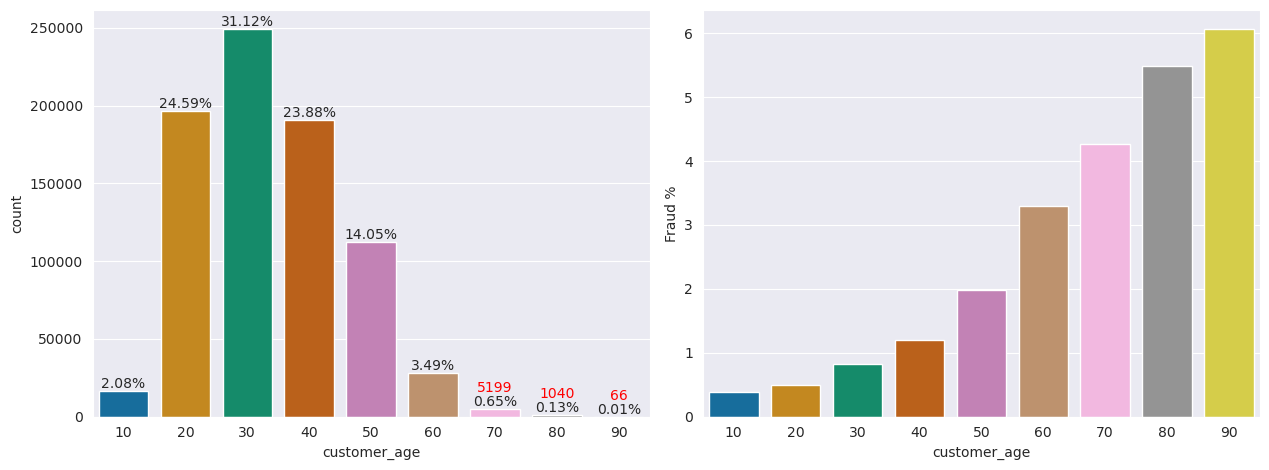

--------------------------------------------- 

 Feature: 'email_is_free'

 Description: Domain of application email (either free or paid).


,dtype,count,unique,missing_count,missing_percentage,mean,std,min,median,max,cv,corr_with_target
email_is_free,int64,800000,2,0,0.0,0.53,0.5,0.0,1.0,1.0,0.94,0.03


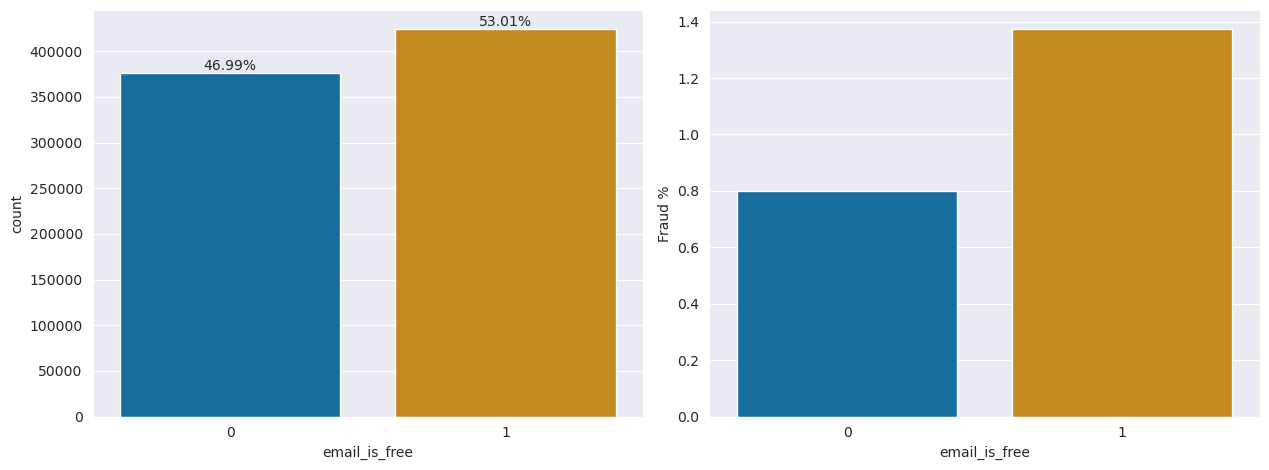

--------------------------------------------- 

 Feature: 'phone_home_valid'

 Description: Validity of provided home phone.


,dtype,count,unique,missing_count,missing_percentage,mean,std,min,median,max,cv,corr_with_target
phone_home_valid,int64,800000,2,0,0.0,0.42,0.49,0.0,0.0,1.0,1.18,-0.03


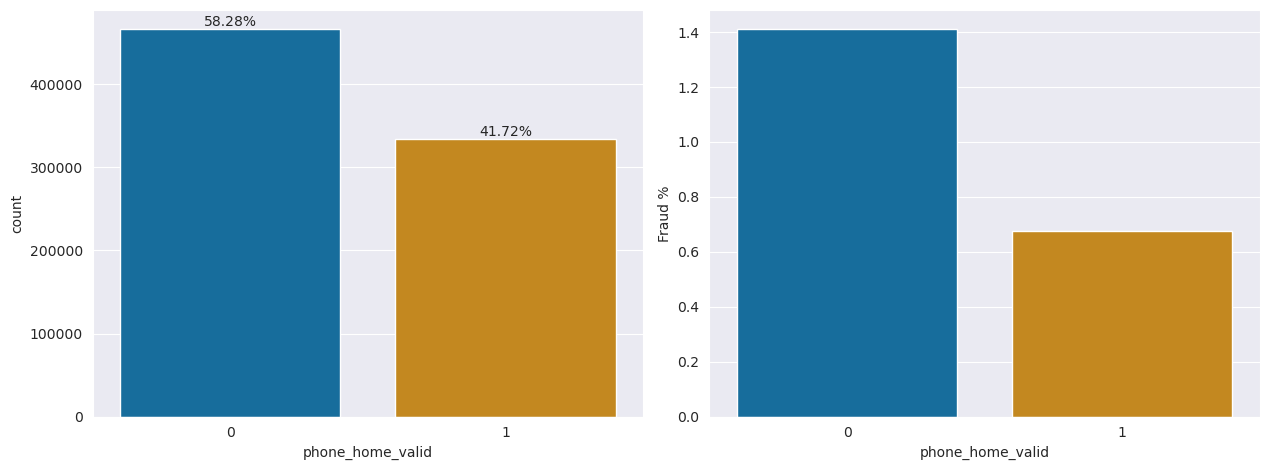

--------------------------------------------- 

 Feature: 'phone_mobile_valid'

 Description: Validity of provided mobile phone.


,dtype,count,unique,missing_count,missing_percentage,mean,std,min,median,max,cv,corr_with_target
phone_mobile_valid,int64,800000,2,0,0.0,0.89,0.31,0.0,1.0,1.0,0.35,-0.01


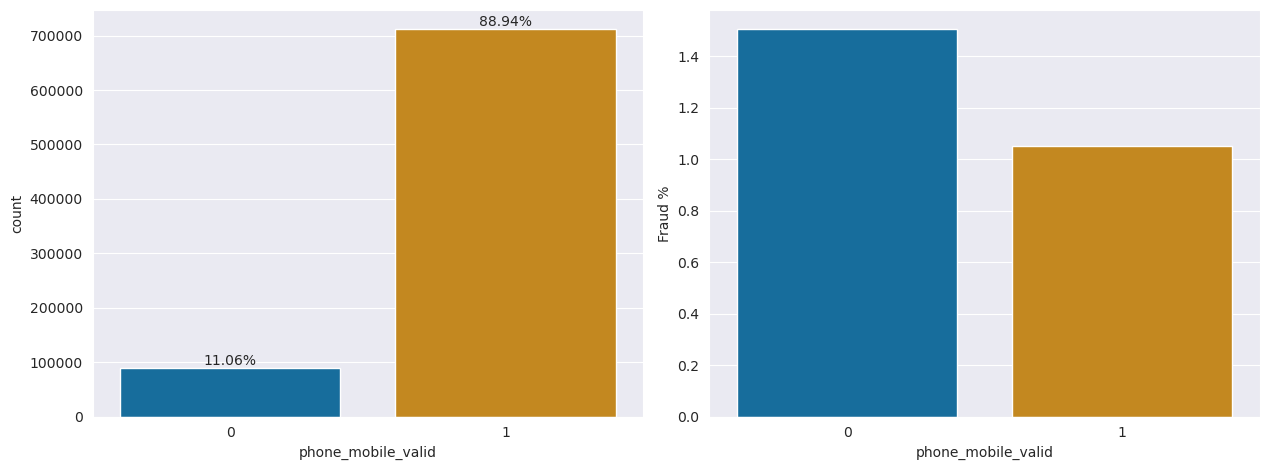

--------------------------------------------- 

 Feature: 'has_other_cards'

 Description: If applicant has other cards from the same banking company.


,dtype,count,unique,missing_count,missing_percentage,mean,std,min,median,max,cv,corr_with_target
has_other_cards,int64,800000,2,0,0.0,0.22,0.42,0.0,0.0,1.0,1.87,-0.04


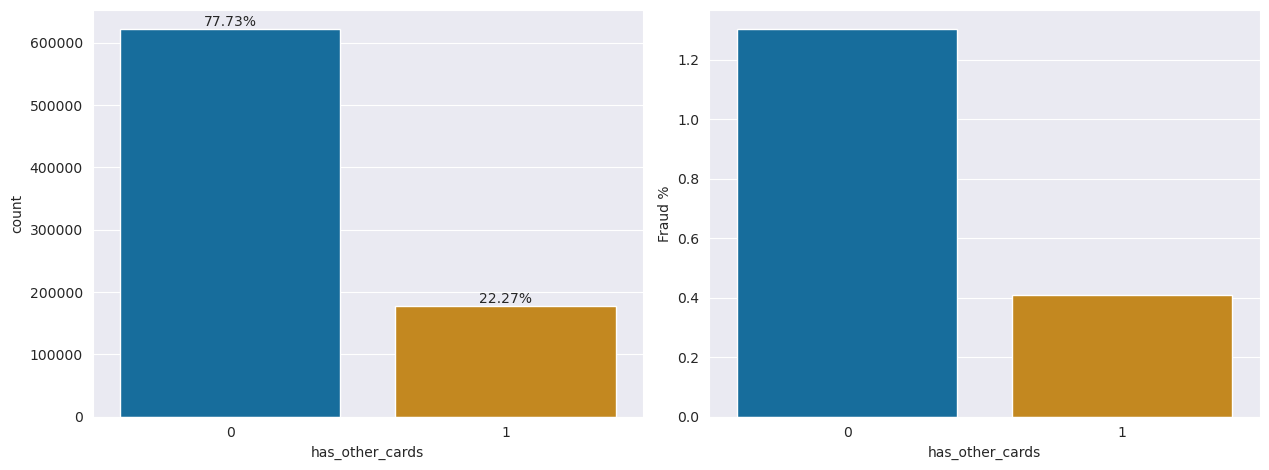

--------------------------------------------- 

 Feature: 'proposed_credit_limit'

 Description: Applicant’s proposed credit limit. Ranges between [200, 2000].


,dtype,count,unique,missing_count,missing_percentage,mean,std,min,median,max,cv,corr_with_target
proposed_credit_limit,float64,800000,12,0,0.0,516.09,487.74,190.0,200.0,2100.0,0.95,0.07


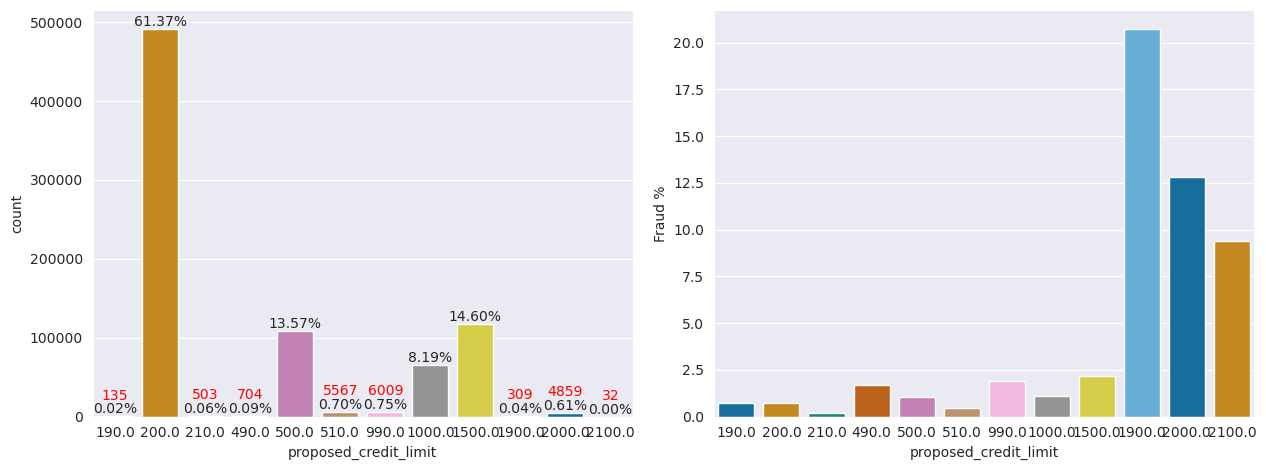

--------------------------------------------- 

 Feature: 'foreign_request'

 Description: If origin country of request is different from bank’s country.


,dtype,count,unique,missing_count,missing_percentage,mean,std,min,median,max,cv,corr_with_target
foreign_request,int64,800000,2,0,0.0,0.03,0.16,0.0,0.0,1.0,6.21,0.02


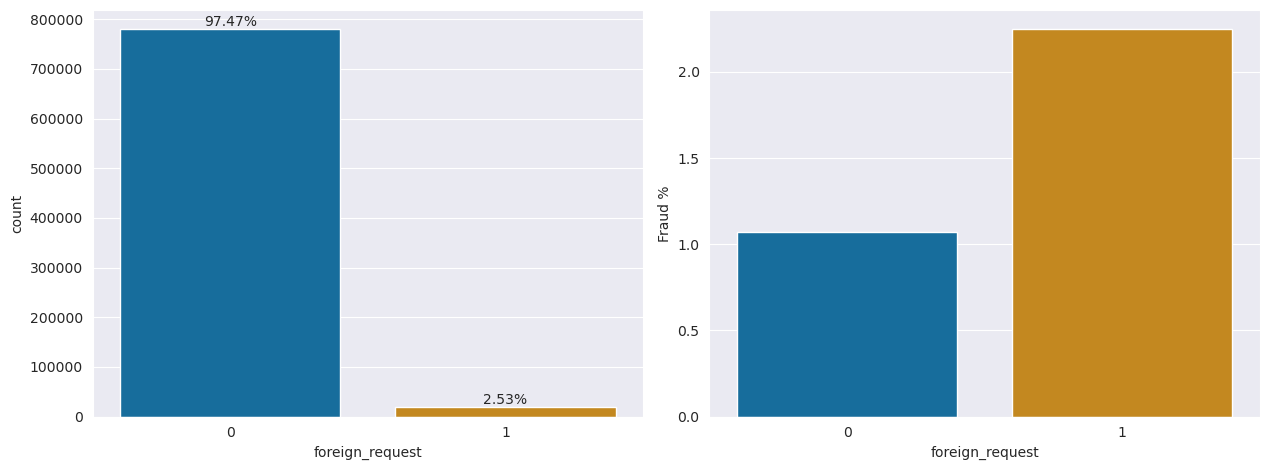

--------------------------------------------- 

 Feature: 'keep_alive_session'

 Description: User option on session logout.


,dtype,count,unique,missing_count,missing_percentage,mean,std,min,median,max,cv,corr_with_target
keep_alive_session,int64,800000,2,0,0.0,0.58,0.49,0.0,1.0,1.0,0.86,-0.05


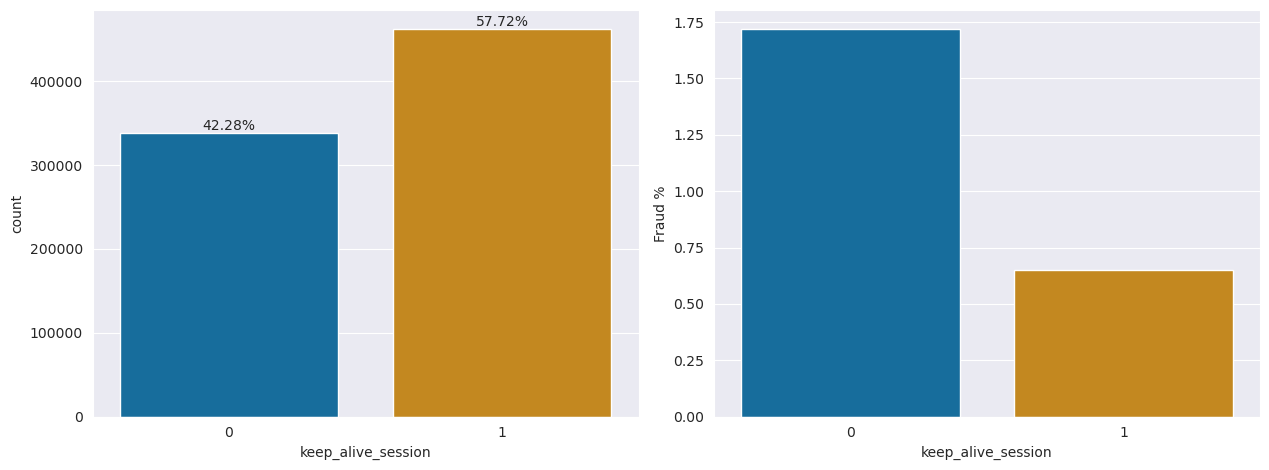

--------------------------------------------- 

 Feature: 'device_distinct_emails_8w'

 Description: Number of distinct emails in banking website from the used device in last 8 weeks. Ranges between [−1, 2] emails (-1 is a missing value).


,dtype,count,unique,missing_count,missing_percentage,mean,std,min,median,max,cv,corr_with_target
device_distinct_emails_8w,float64,799710,3,290,0.04,1.02,0.18,0.0,1.0,2.0,0.17,0.04


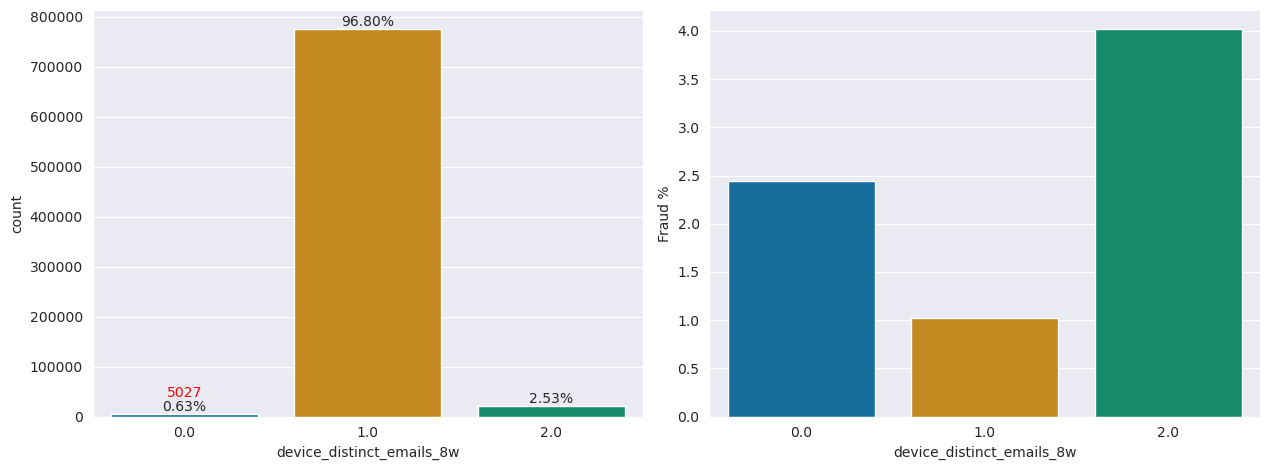

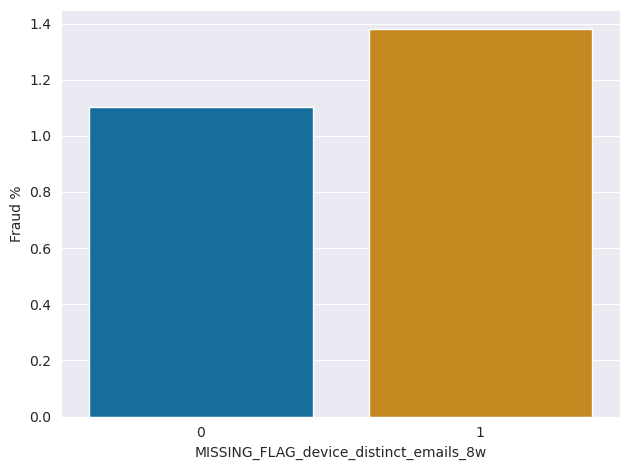

--------------------------------------------- 

 Feature: 'device_fraud_count'

 Description: Number of fraudulent applications with used device. Ranges between [0, 1].


,dtype,count,unique,missing_count,missing_percentage,mean,std,min,median,max,cv,corr_with_target
device_fraud_count,int64,800000,1,0,0.0,0.0,0.0,0.0,0.0,0.0,nan,nan


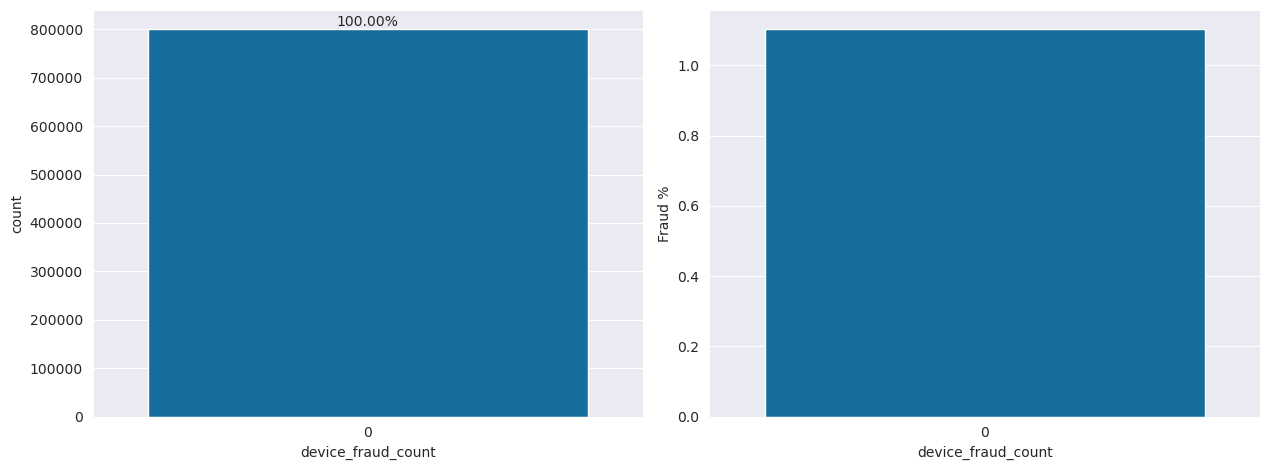

--------------------------------------------- 

 Feature: 'month'

 Description: Month where the application was made. Ranges between [0, 7].


,dtype,count,unique,missing_count,missing_percentage,mean,std,min,median,max,cv,corr_with_target
month,int64,800000,8,0,0.0,3.29,2.21,0.0,3.0,7.0,0.67,0.01


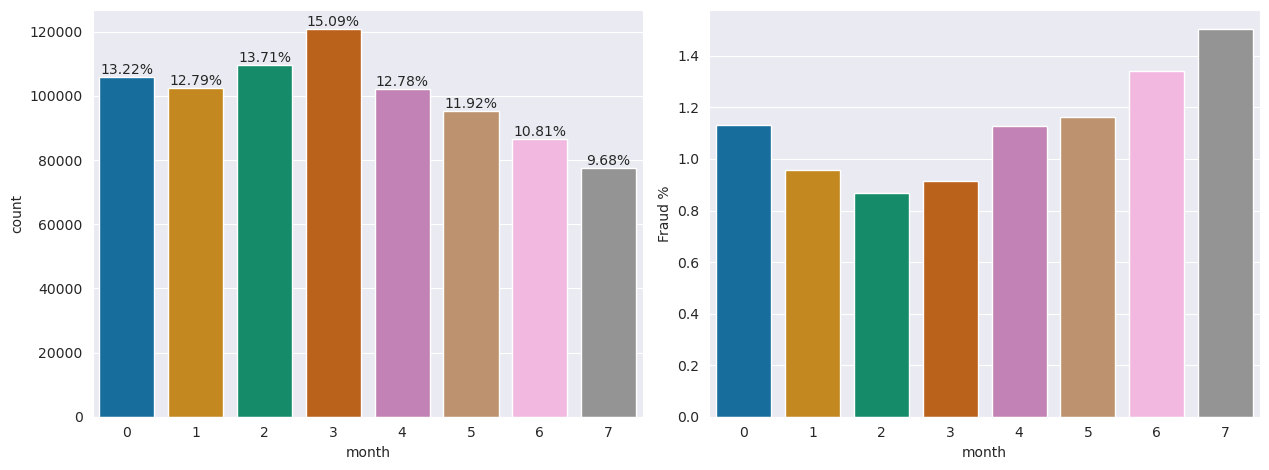

--------------------------------------------- 



In [22]:
for feat in disc_feats:
    print(f"\033[1m Feature:\033[0m '{feat}'\n")
    print(f"\033[1m Description:\033[0m {feature_descriptions[feat]}")
    summary(feat)
    print('-'*45,'\n')

## Categorical features

Applying `summary` function to all categorical features:

 Feature: 'payment_type'

 Description: Credit payment plan type. 5 possible (annonymized) values.


,dtype,count,unique,missing_count,missing_percentage
payment_type,object,800000,5,0,0.0


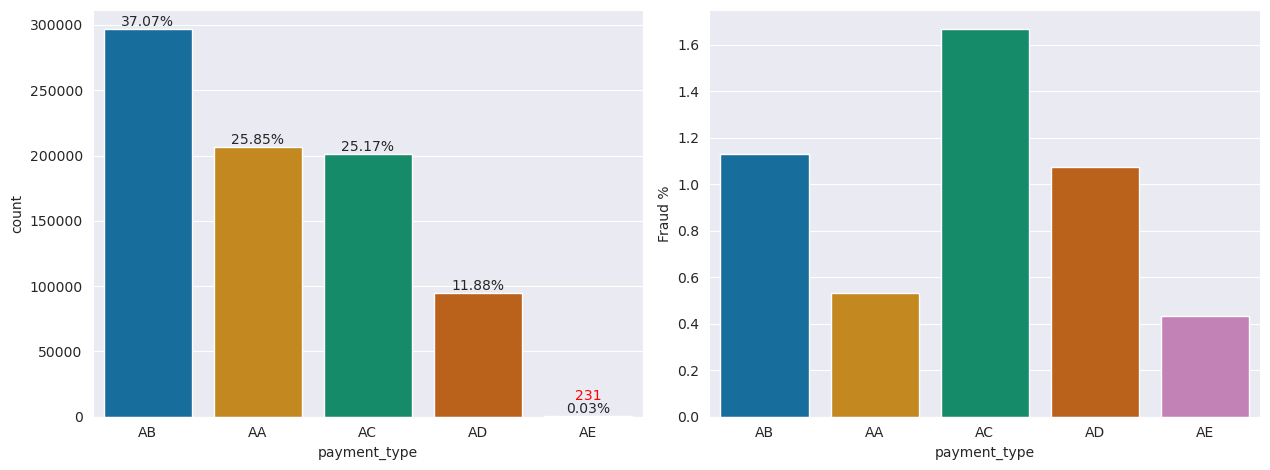

--------------------------------------------- 

 Feature: 'employment_status'

 Description: Employment status of the applicant. 7 possible (annonymized) values.


,dtype,count,unique,missing_count,missing_percentage
employment_status,object,800000,7,0,0.0


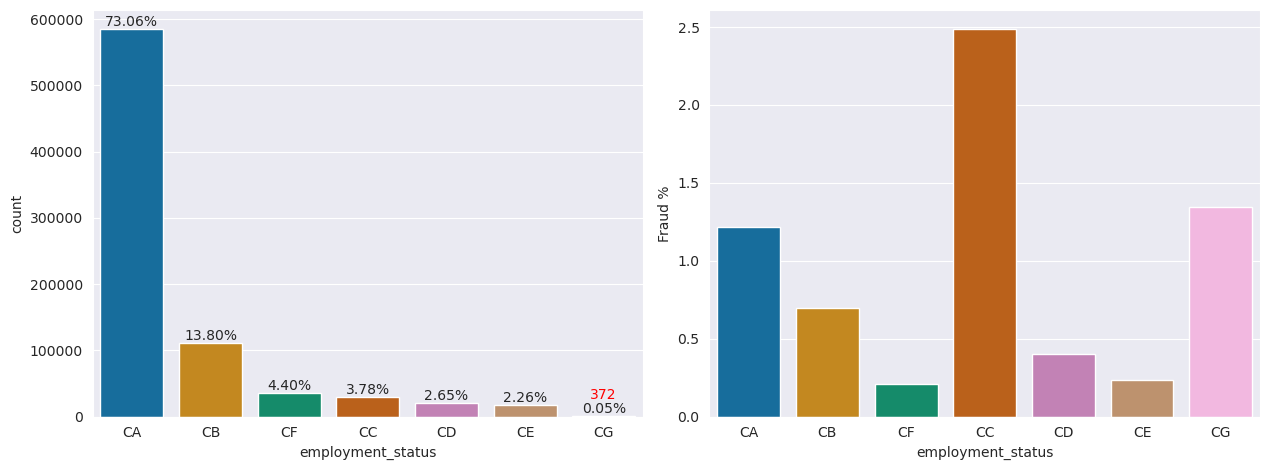

--------------------------------------------- 

 Feature: 'housing_status'

 Description: Current residential status for applicant. 7 possible (annonymized) values.


,dtype,count,unique,missing_count,missing_percentage
housing_status,object,800000,7,0,0.0


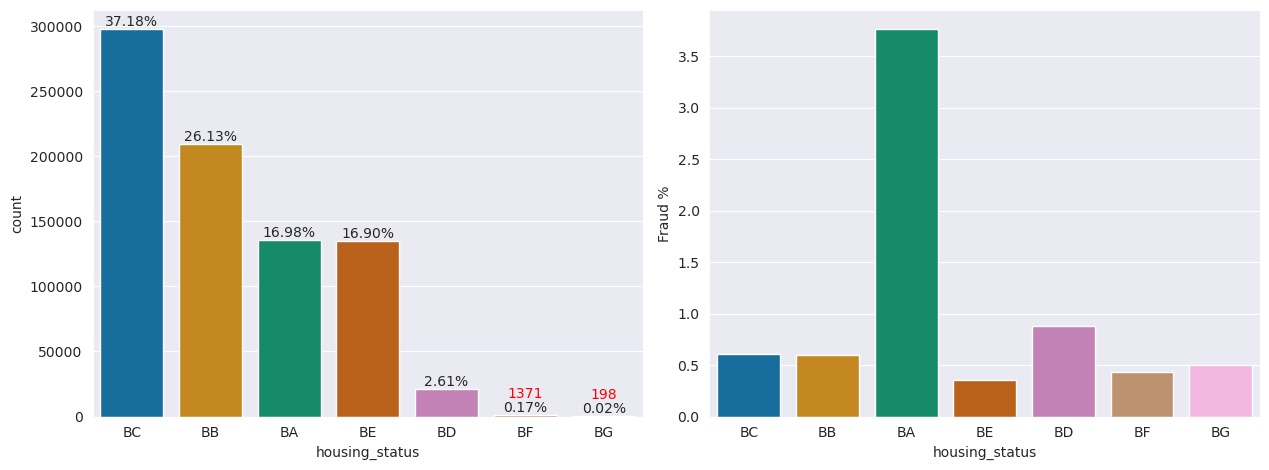

--------------------------------------------- 

 Feature: 'source'

 Description: Online source of application. Either browser (INTERNET) or app (TELEAPP).


,dtype,count,unique,missing_count,missing_percentage
source,object,800000,2,0,0.0


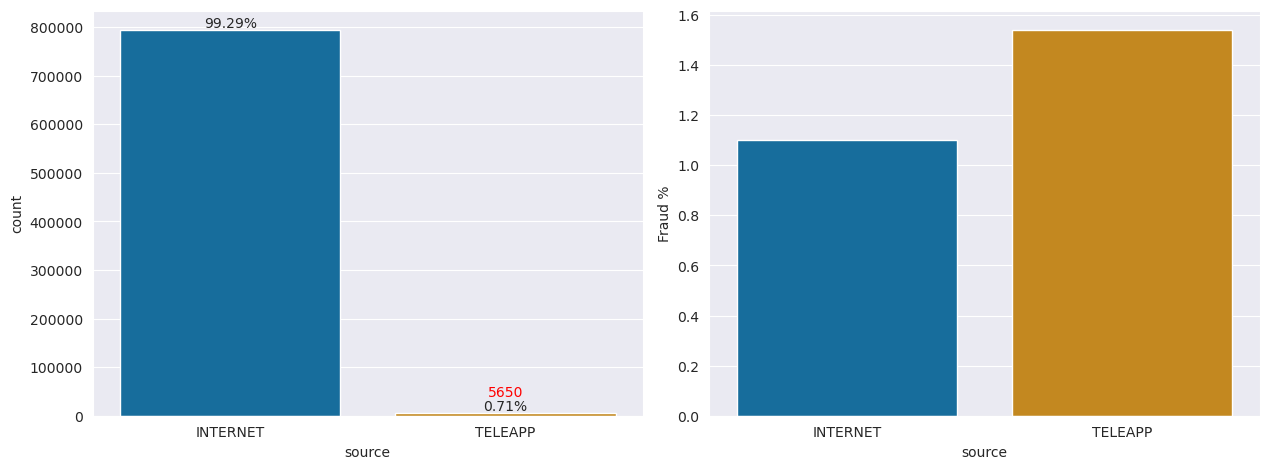

--------------------------------------------- 

 Feature: 'device_os'

 Description: Operative system of device that made request. Possible values are: Windows, macOS, Linux, X11, or other.


,dtype,count,unique,missing_count,missing_percentage
device_os,object,800000,5,0,0.0


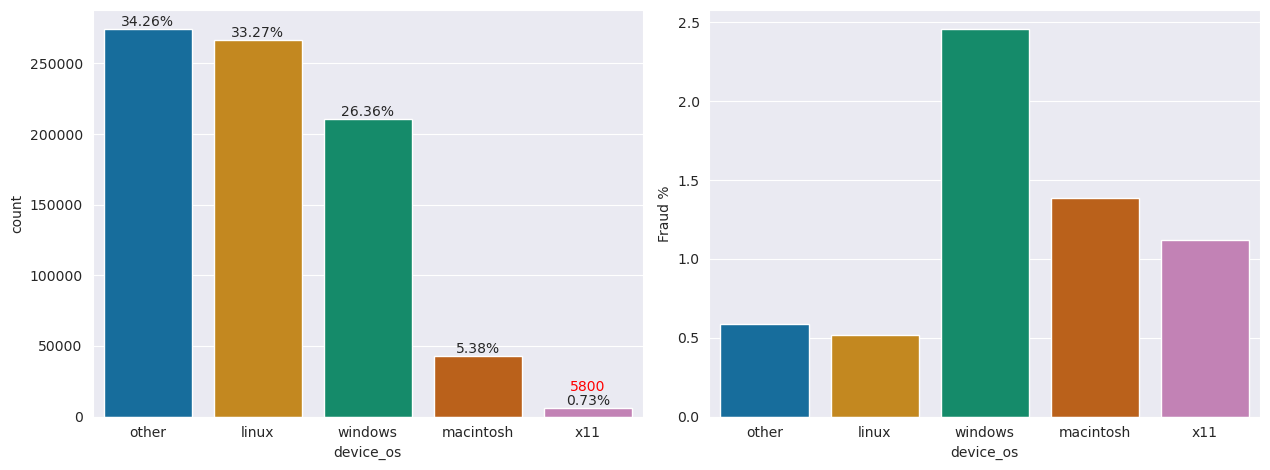

--------------------------------------------- 



In [23]:
for feat in cat_feats:
    print(f"\033[1m Feature:\033[0m '{feat}'\n")
    print(f'\033[1m Description:\033[0m {feature_descriptions[feat]}')
    summary(feat)
    print('-'*45,'\n')

## Correlation coefficients

Correlation between each feature and the target (fraud or not):

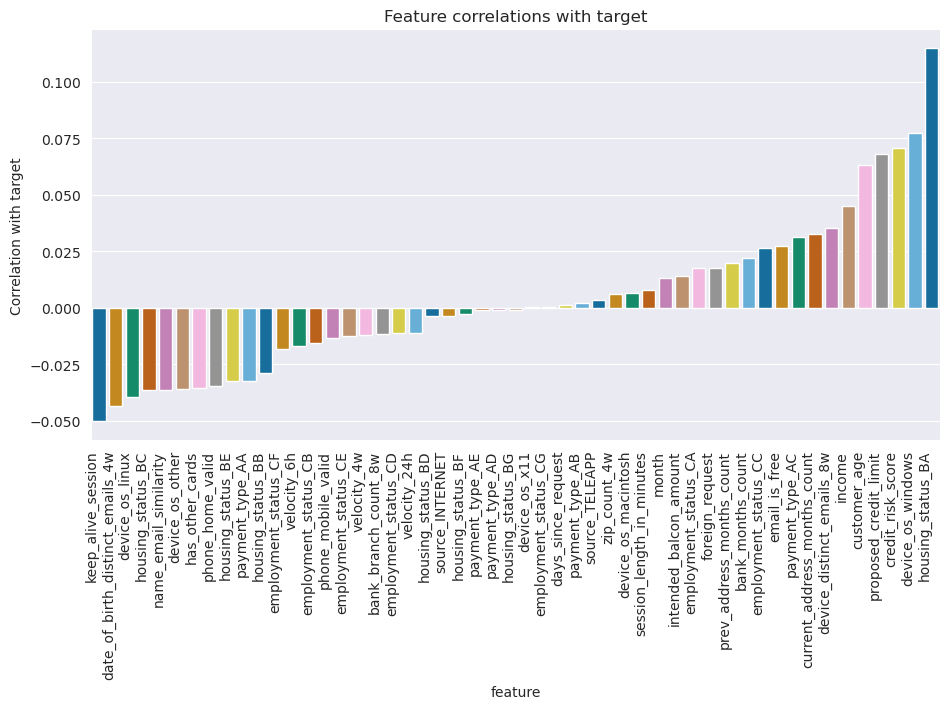

In [24]:
# Correlation coefficient between features and target

fig = plt.figure(figsize=(9.6,7.2))

corr_target = pd.DataFrame(pd.get_dummies(X_train.drop('device_fraud_count',axis=1))
                           .corrwith(y_train)).reset_index()

corr_target.columns = ['feature','target_correlation']
corr_target = corr_target.sort_values(by='target_correlation')

ax = sns.barplot(data=corr_target,x='feature',y='target_correlation',palette=palette)
ax.set_title('Feature correlations with target')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="right")
ax.set_ylabel('Correlation with target')

fig.tight_layout()
plt.show()